# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Library to manage warnings thrown by code
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to manage and manipulate data
import pandas as pd
import numpy as np

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Setting limits & formatting for displays 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# For building model and decision tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV

# To get metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Mounting drive for loading data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Loading data and making copy
hotel = pd.read_csv('/content/drive/My Drive/DSBA Notebooks/U4/Project 4/INNHotelsGroup.csv')
data = hotel.copy()

In [ ]:
# Checking that data loaded properly
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

The dataset loaded properly.

In [ ]:
# Checking shape of data
data.shape

(36275, 19)

36,275 rows and 19 columns. From what I see, there's one unnecessary column, 17 predictor columns, and 1 target column (booking_status).

In [ ]:
# Checking data types and for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Booking_ID is of dtype "object", but this will not matter, as booking_ID will be dropped.

Numerical columns:
- no_of_adults
- no_of_children
- no_of_weekend_nights
- no_of_week_nights
- lead_time
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- avg_price_per_room
- no_of_special_requests

Categorical columns:
- type_of_meal_plan
- required_car_parking_space
- room_type_reserved
- arrival_year
- arrival_month
- arrival_date
- market_segment_type
- repeated_guest
- booking_status

Target column: booking_status

No missing values, from what I can see.

In [ ]:
# Designating numerical and categorical columns for later use
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [ ]:
# Printing categorical counts
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'booking_status']
for col in cat_cols:
  print(data[col].value_counts())
  print("-"*50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
--------------------------------------------------
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
--------------------------------------------------
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
--------------------------------------------------
2018    29761
2017     6514
Name: arrival_year, dtype: int64
--------------------------------------------------
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
--------------------------------------------------
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12   

In [ ]:
# Encoding target variable
data["booking_status"] =data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [ ]:
data['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

Booking status now has values of 1 & 0 - 1 if the booking is canceled and 0 if the booking holds

In [ ]:
# Checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No missing values.

In [ ]:
# Checking statistical summary of data
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   
booking_status                       36275.00000    0.32764  0.46936   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   
booking_status                          0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000  
booking_status                          1.00000    1.00000

Observations:
- Values with min = 0 and max = 1 are binary values, so this summary is insignificant for them
- Notice that minimum value for avg_price_per_room is 0, but this corresponds with "online" and "complementary" market segments, so they are not missing values
- no_of_children max value is severe, at 10 when the average is 0.11
- no_of_weekend_nights and no_of_week_nights max values are also severe, with 7 and 17, basically saying the person(s) stayed for a few weeks
- arrival_year - arrival_date are really categorical values, so no need to worry about them here
- avg_price_per_room also has a severe max value of 540, so I will check this for outliers

In [ ]:
# Checking duplicated entries
data.duplicated().sum()

0

No duplicated entries

In [ ]:
# Checking that booking_ID is unique and unnecessary
data['Booking_ID'].nunique()

36275

Booking_ID is definitely a unique identifier for each entry, so it is unnecessary and will be dropped from the dataframe.

In [ ]:
# Dropping booking_ID
data.drop(['Booking_ID'], axis=1, inplace=True)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [ ]:
# Function to visualize numerical columns
def hist_box(data, feature, figsize=(15,10), kde=True, bins=None):
  """
  Function to create combined histogram and boxplot
  
  data: dataframe
  feature: dataframe column
  figsize: size of figure (default (15,10))
  kde: whether to show density curve (default True)
  bins: number of bins for histogram (default None)
  """

  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize=figsize
  )
  sns.boxplot(
      data=data,
      x=feature,
      ax=ax_box2,
      showmeans=True,
      color="violet"
  )
  sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax_hist2,
      bins=bins
  ) if bins else sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(),
      color="green",
      linestyle="--"
  )
  ax_hist2.axvline(
      data[feature].median(),
      color="black", linestyle="-"
  )

In [ ]:
# Function to visualize categorical columns
def labeled_barplot(data, feature, perc=False, n=None):
  """
  Function to create labeled barplot

  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default False)
  n: displays top n category levels (default is to display all (None))
  """
  
  total = len(data[feature])
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 2, 6))
  else:
    plt.figure(figsize=(n + 2, 6))

  plt.xticks(rotation=90, fontsize=15)
  ax = sns.countplot(
      data=data,
      x=feature,
      palette="Paired",
      order=data[feature].value_counts().index[:n]
  )

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(
          100 * p.get_height() / total
      )
    else:
      label = p.get_height()
    
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )

    plt.show()


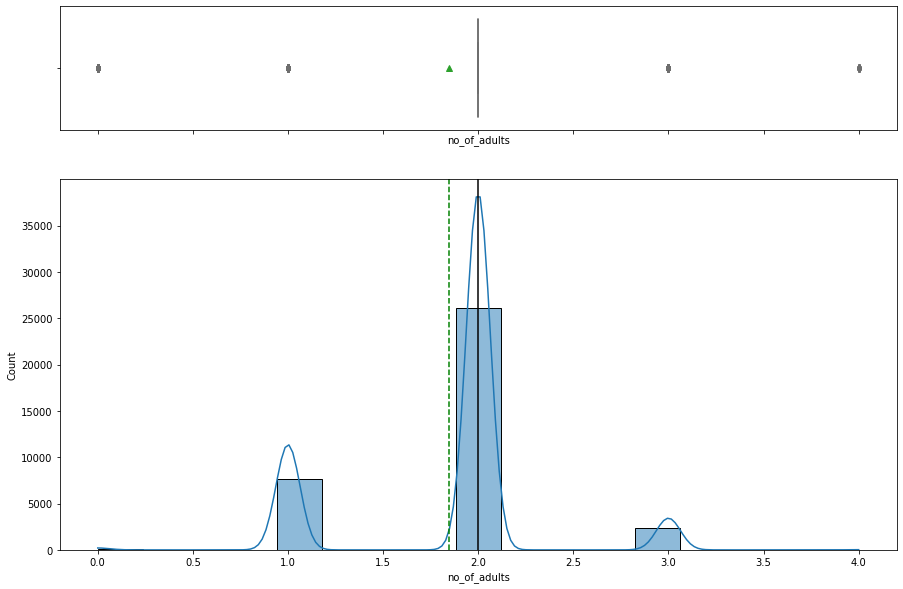

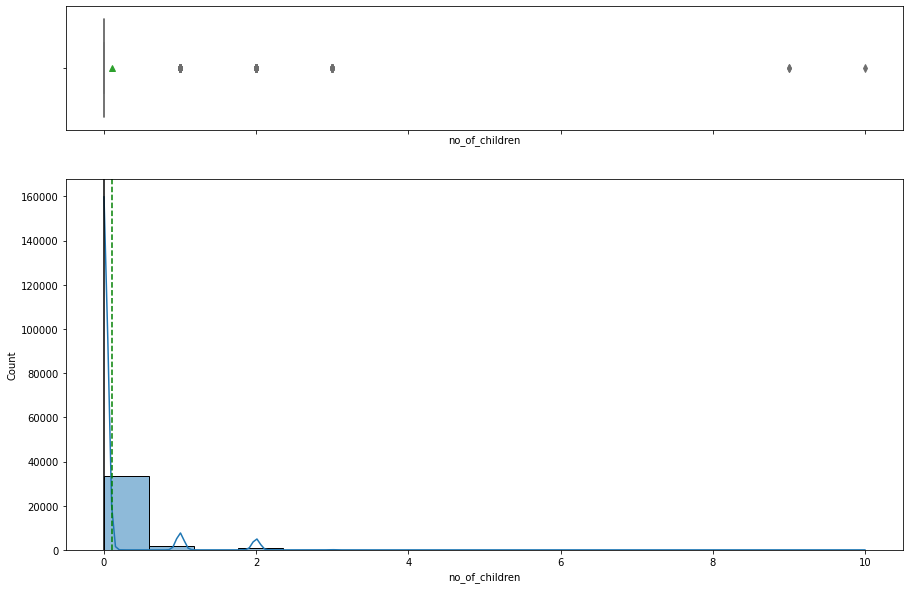

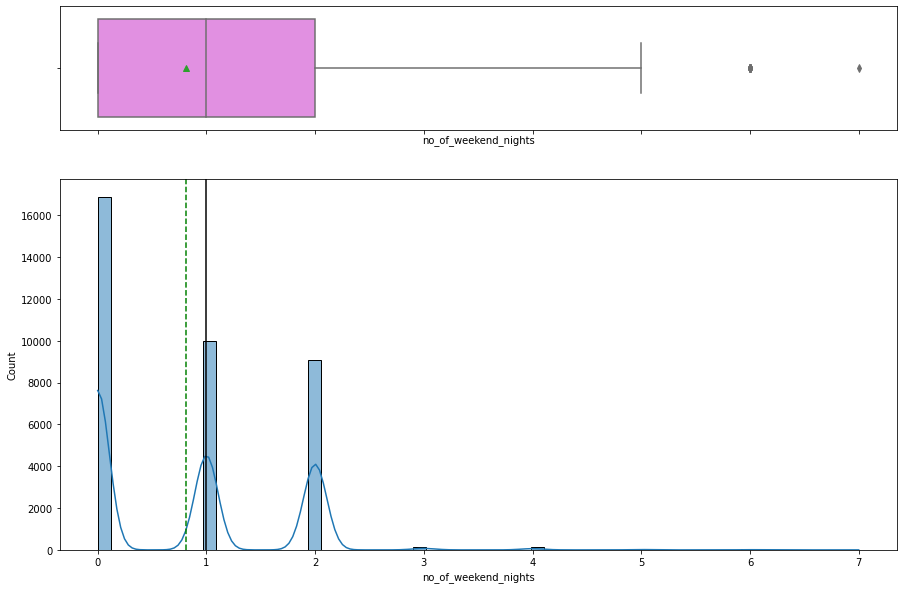

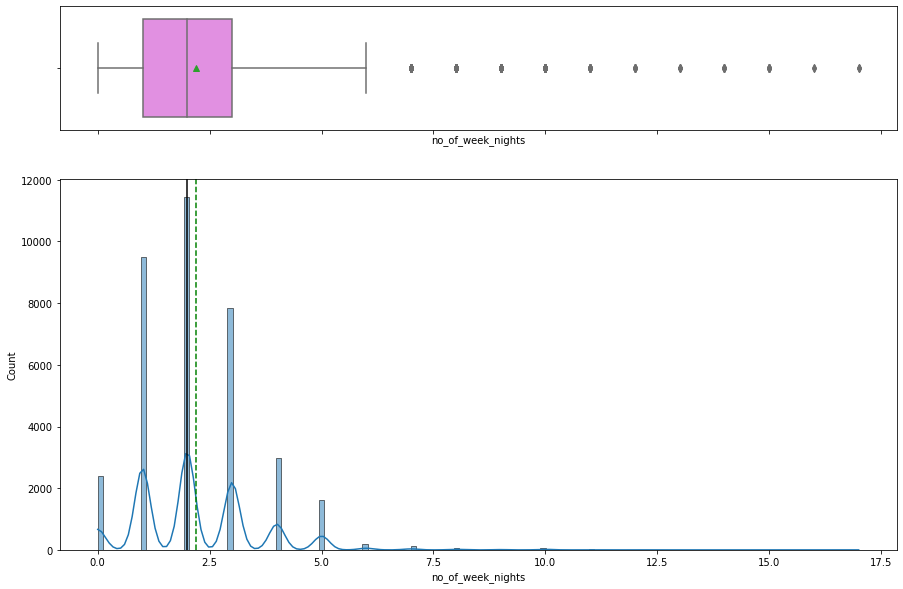

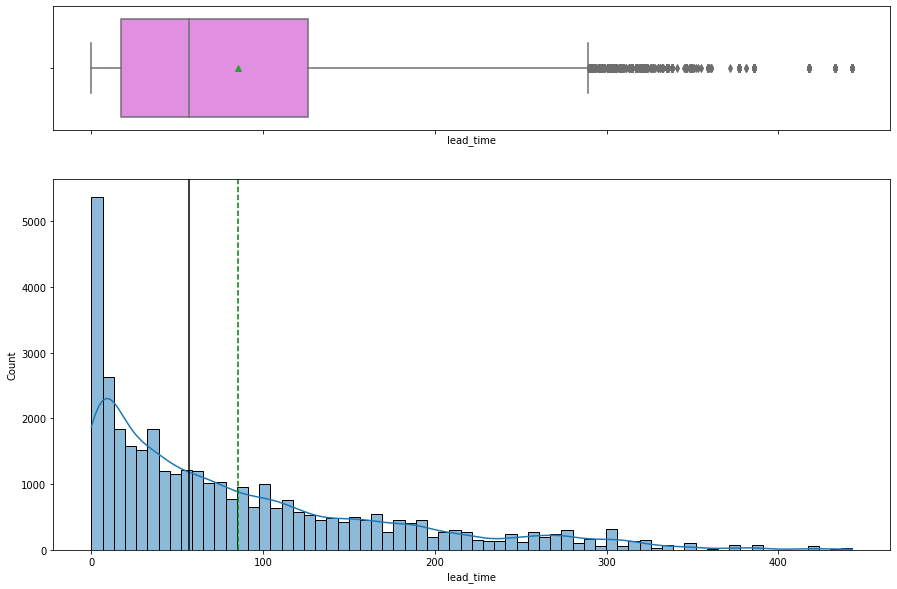

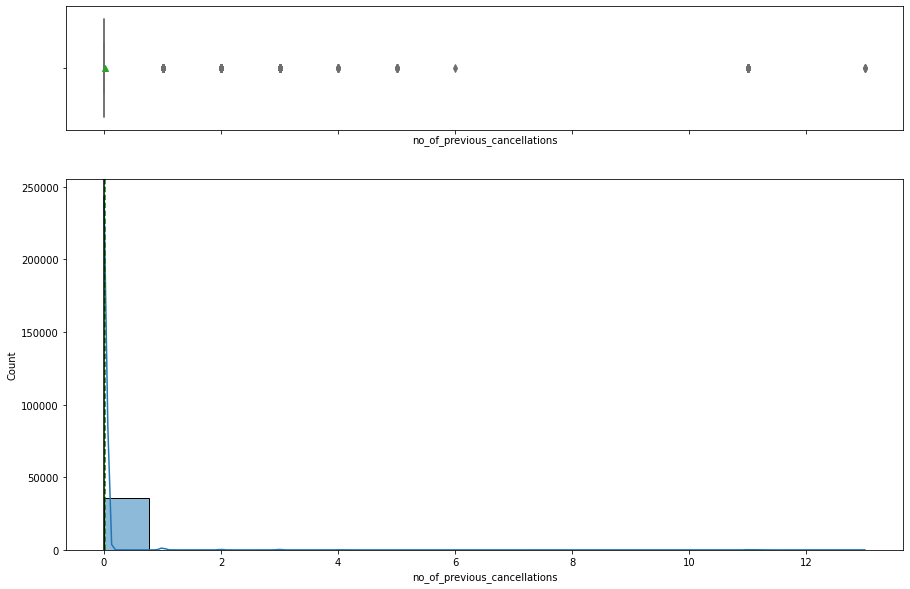

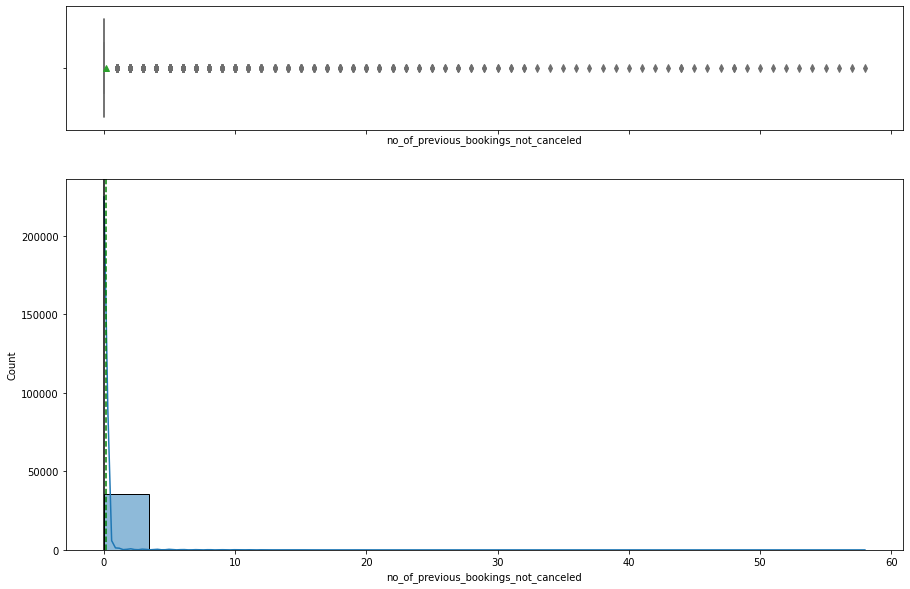

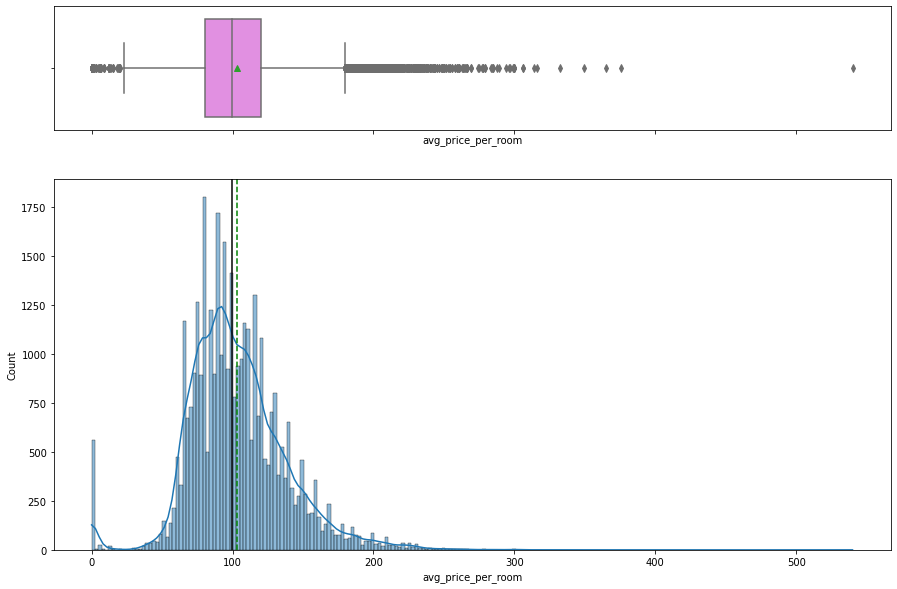

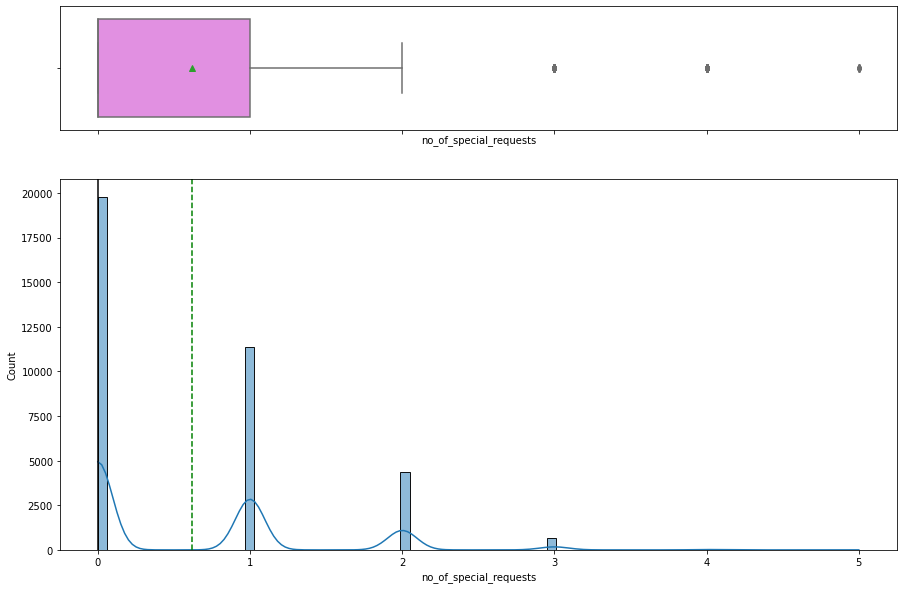

In [ ]:
# Creating combined histogram and boxplots for all numerical columns
for col in num_cols:
  hist_box(data, col)

Observations:
- no_of_adults: pretty normally distributed and reasonable values
- no_of_children: severely right-skewed, 2 outliers at values of 9 and 10 to be investigated for treatment
- no_of_weekend_nights: right-skewed (starting to see a trend in data, overall), but right whisker if pretty far to the right, as well
- no_of_week_nights: right-skewed, but higher values justified against skewness of no_of_weekend_nights
- lead_time - gently right-skewed, consistent and frequent outliers
- no_of_previous_cancellations: severely right-skewed, likely in need of outlier treatment
- no_of_previous_bookings_not_canceled: right-skewed, but very consistent outliers to the right
- avg_price_per_room: almost normal, if not for single sever outlier around value of ~550, will likely need to be treated
- no_of_special_requests: right-skewed, but consistent outliers and only goes up to 5 as max, which is reasonable

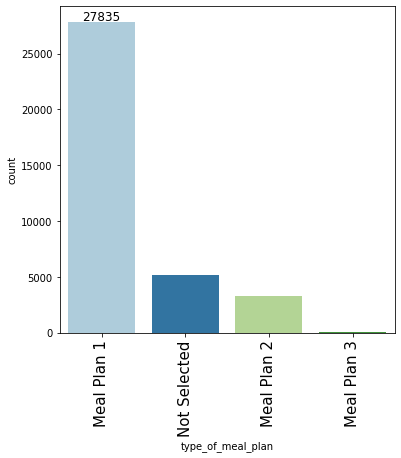

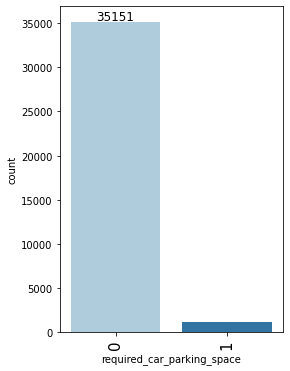

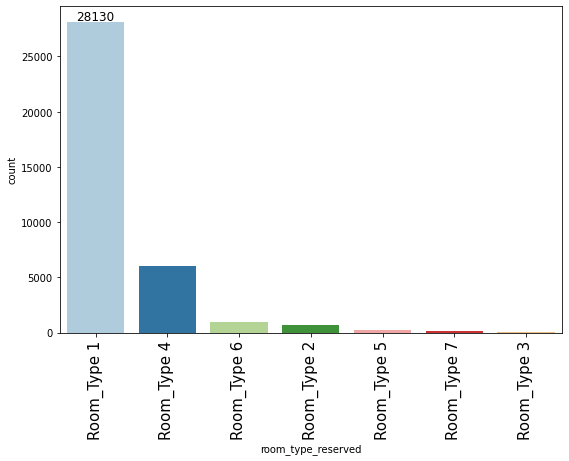

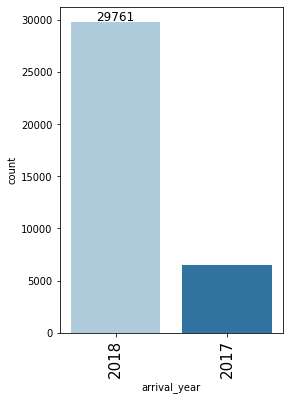

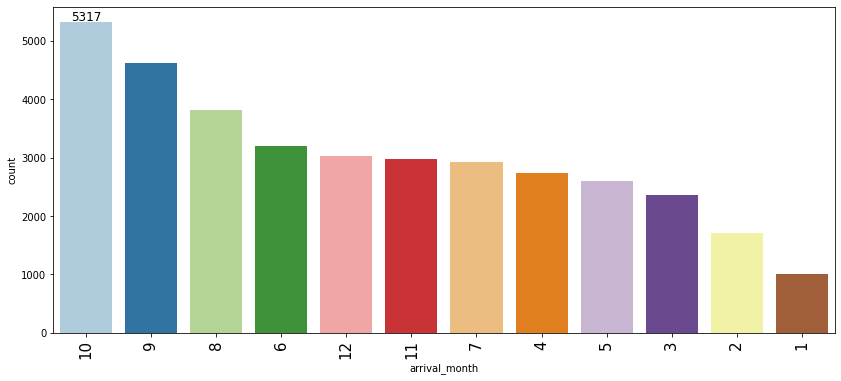

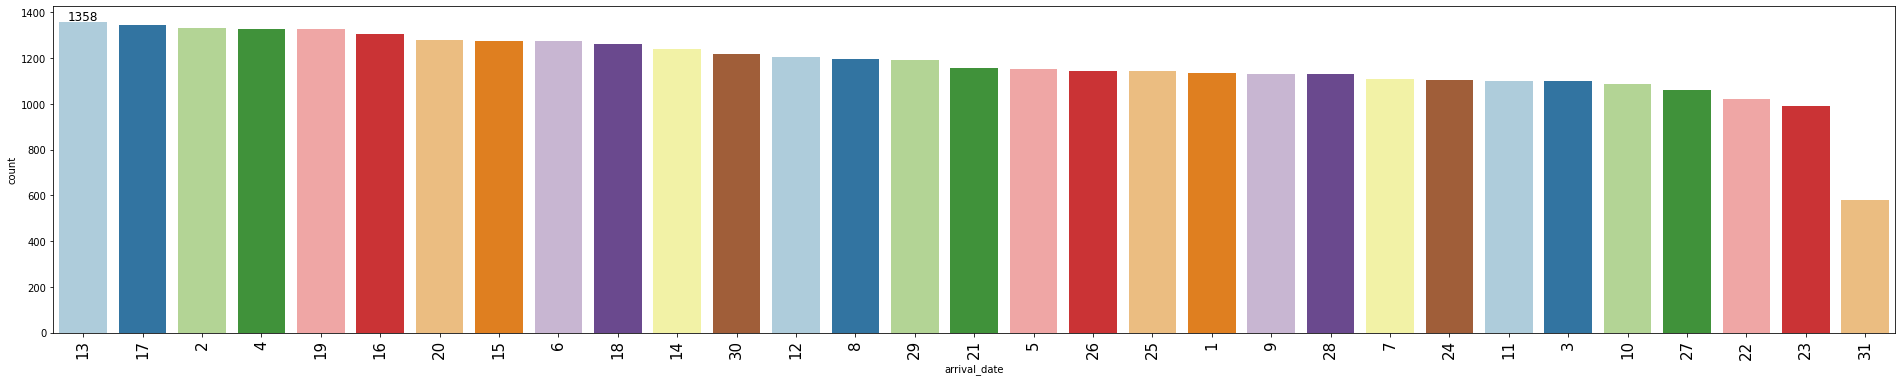

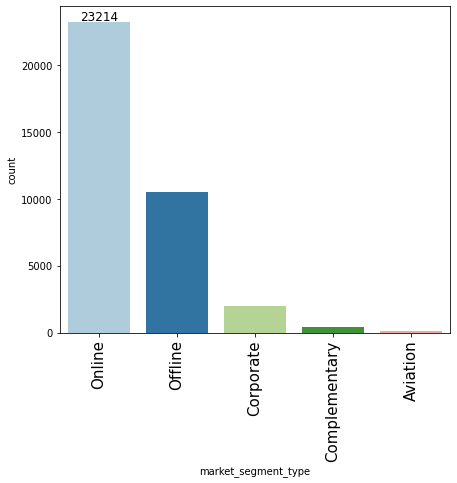

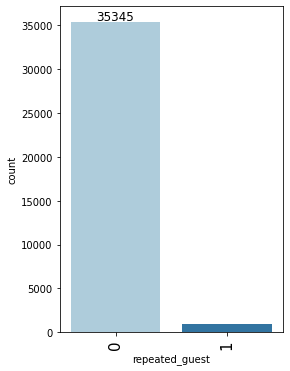

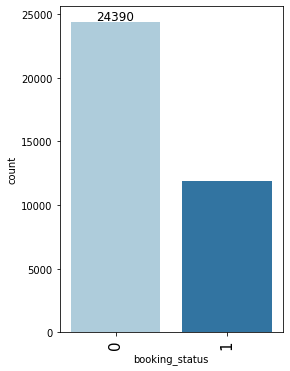

In [ ]:
# Creating labeled barplots for all categorical columns
for col in cat_cols:
  labeled_barplot(data, col)

Observations:
- type_of_meal_plan: has 4 options, Plan 1 (breakfast) was most frequent, accounting for 77% of entries, barely anyone chose Plan 3 (full board)
- required_car_parking_space: 97% chose no parking space
- room_type_reserved: 78% chose Type 1 room, followed by Type 4 and Type 6, barely anyone chose Type 3
- arrival_year: 82% of entries were in 2018
- arrival_month: late fall is most popular (Aug-Oct), while winter/early spring is least popular (Jan-Mar)
- arrival_date: looks like middle of month is most popular (13-20 day)
- mark_segment_type: 64% of bookings were online, followed by offline, with aviation being the least popular segment
- repeated_guest: 97% were not repeated guests
- booking_status: 67% of bookings were not canceled

### Bivariate Analysis

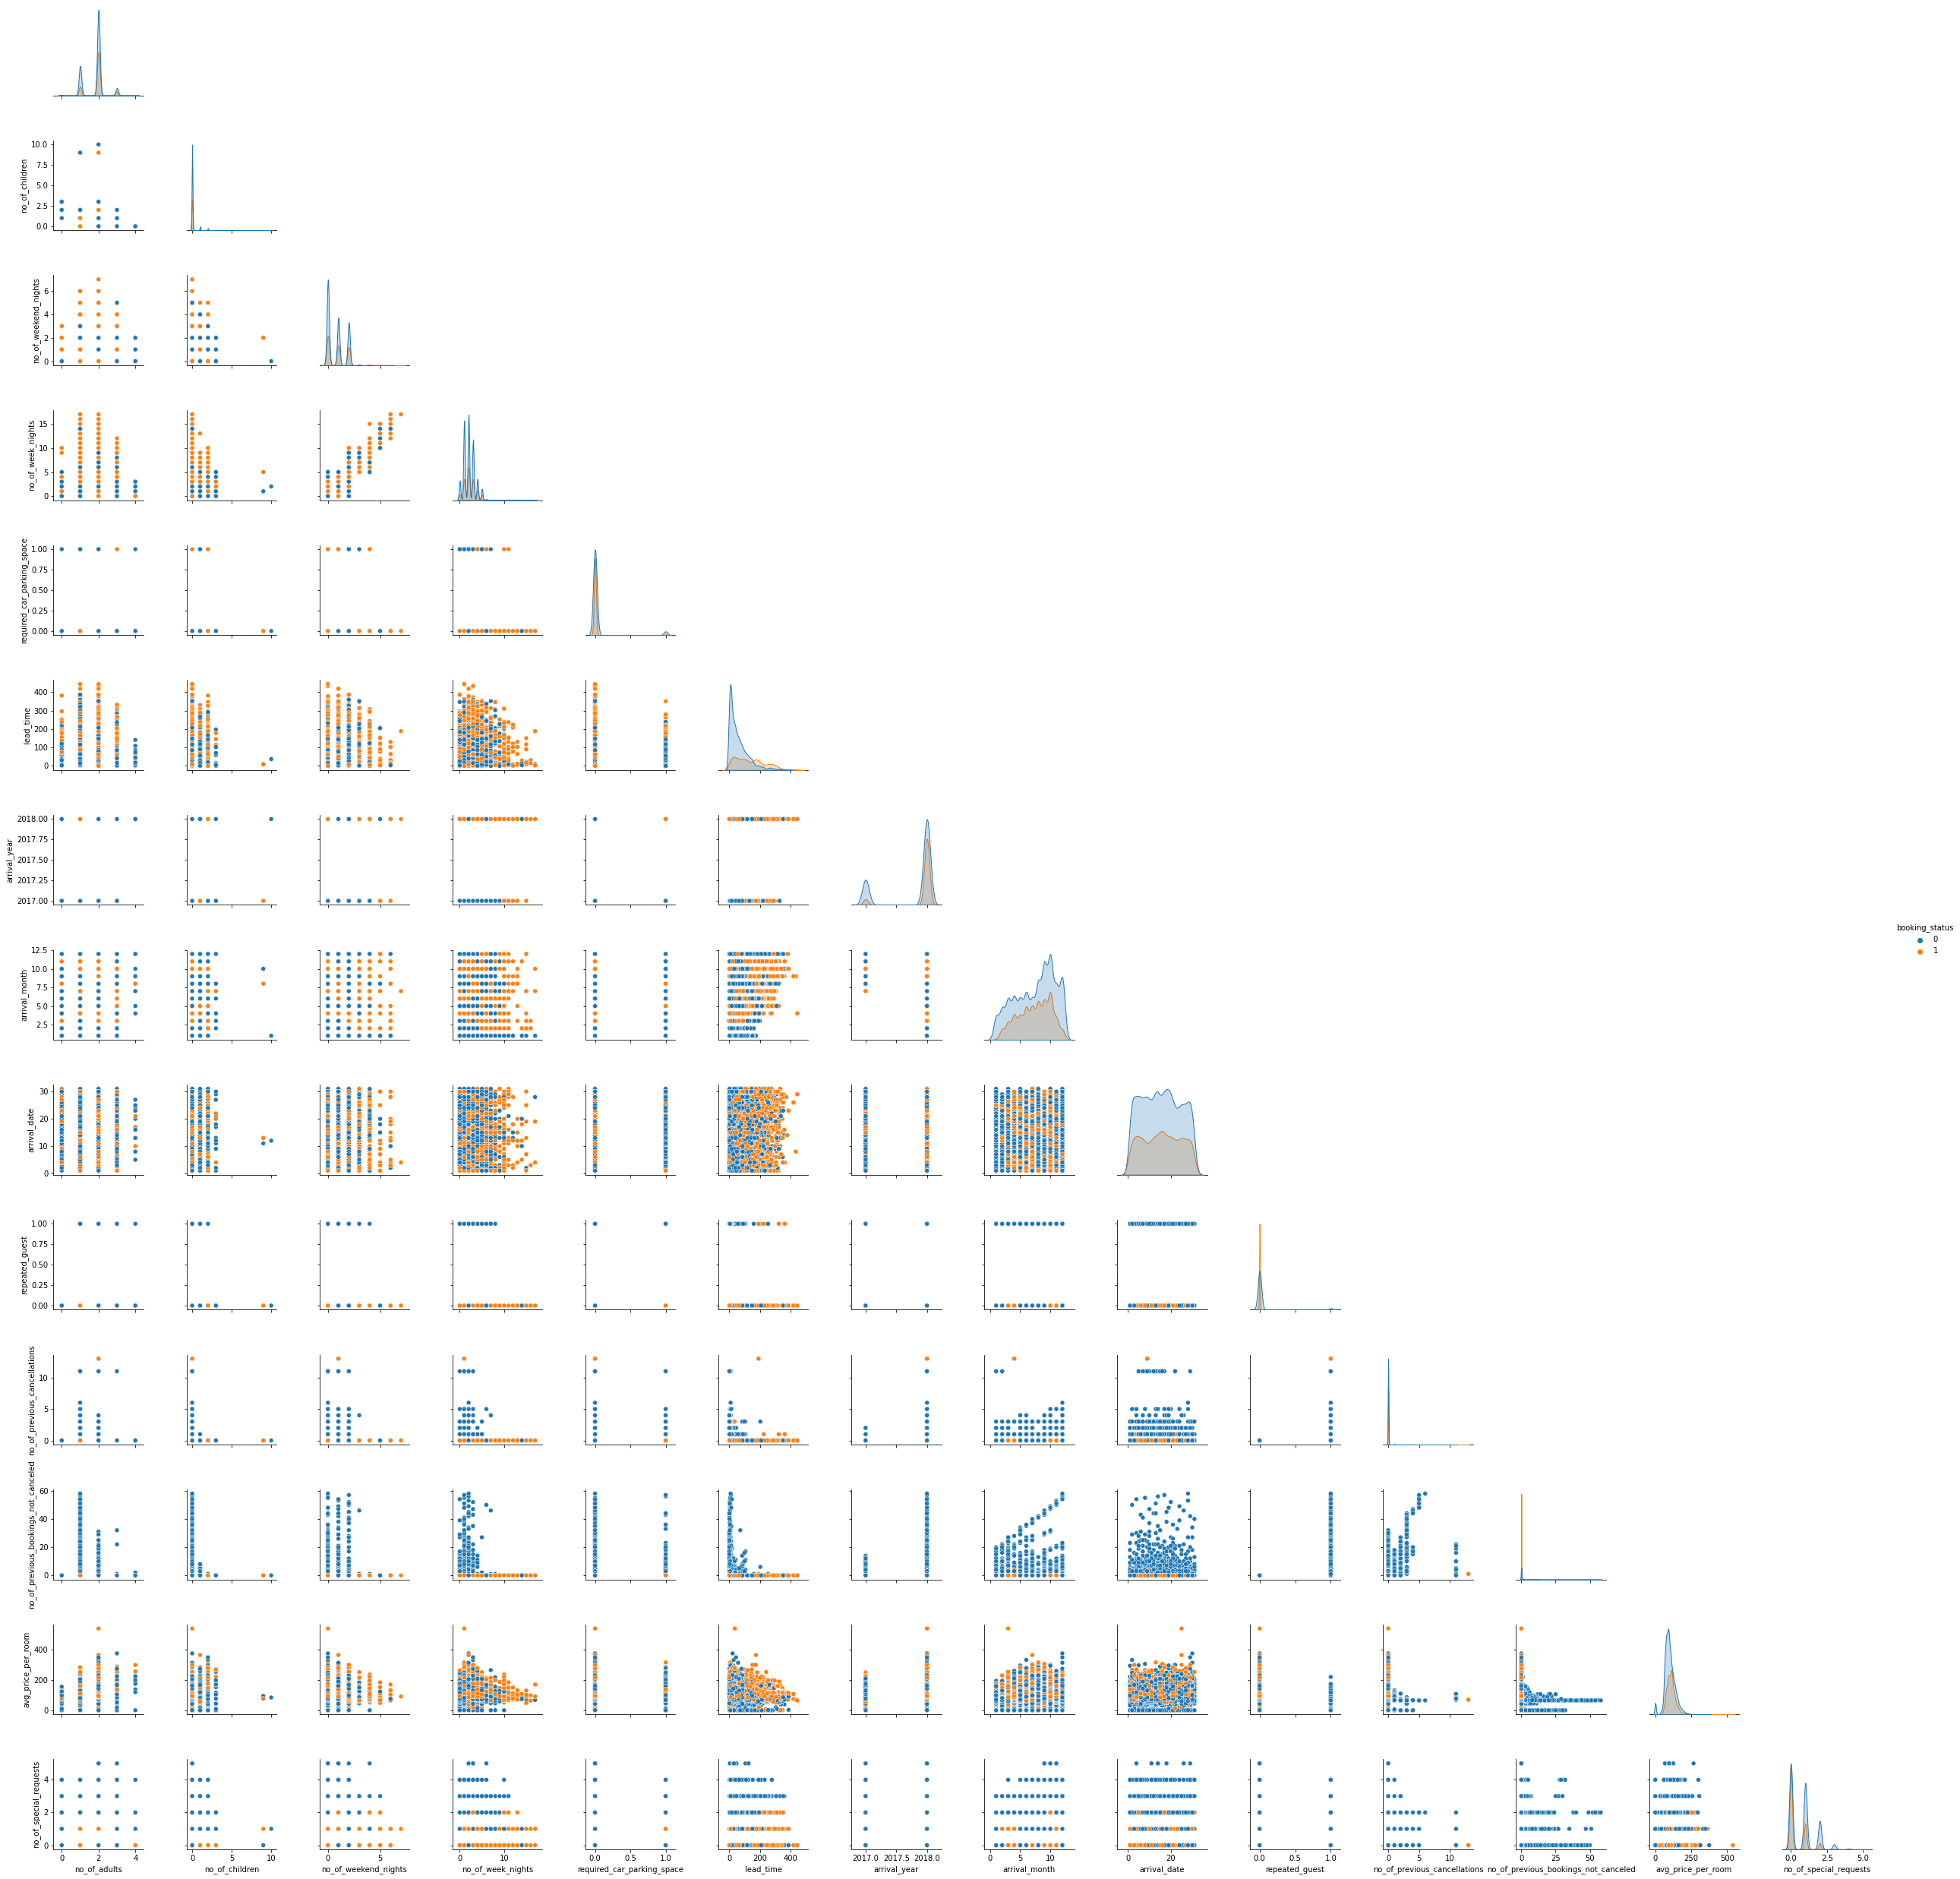

In [ ]:
# Showing paired scatterplot correlations between variables
sns.pairplot(data, hue="booking_status", diag_kind="kde", corner=True)
plt.show()

Observations:
For most kde distributions, non-cancellations mimic and overshadow cancellations, but "lead_time" has a right-skew in non-cancellations before being taken over by cancellations the further right it goes. "repeated_guest" also has a majority of cancellations in category 0, but this may just be due to the overabundance of category 0 entries in comparison to category 1.

More cancellations happen at these intersections:
- high no_of_week_nights, high no_of_adults
- high no_of_week_nights, high no_of_children
- no required_car_parking_space (likely due to abundance of entries in this condition)
- year = 2018 (for similar reason as above)
- year = 2018, did require car parking space
- not a repeated guest (for similar reason as above)
- lead_time ≥ 200 and avg_price_per_room ≥ 100
- no_of_special_requests ≤ 2

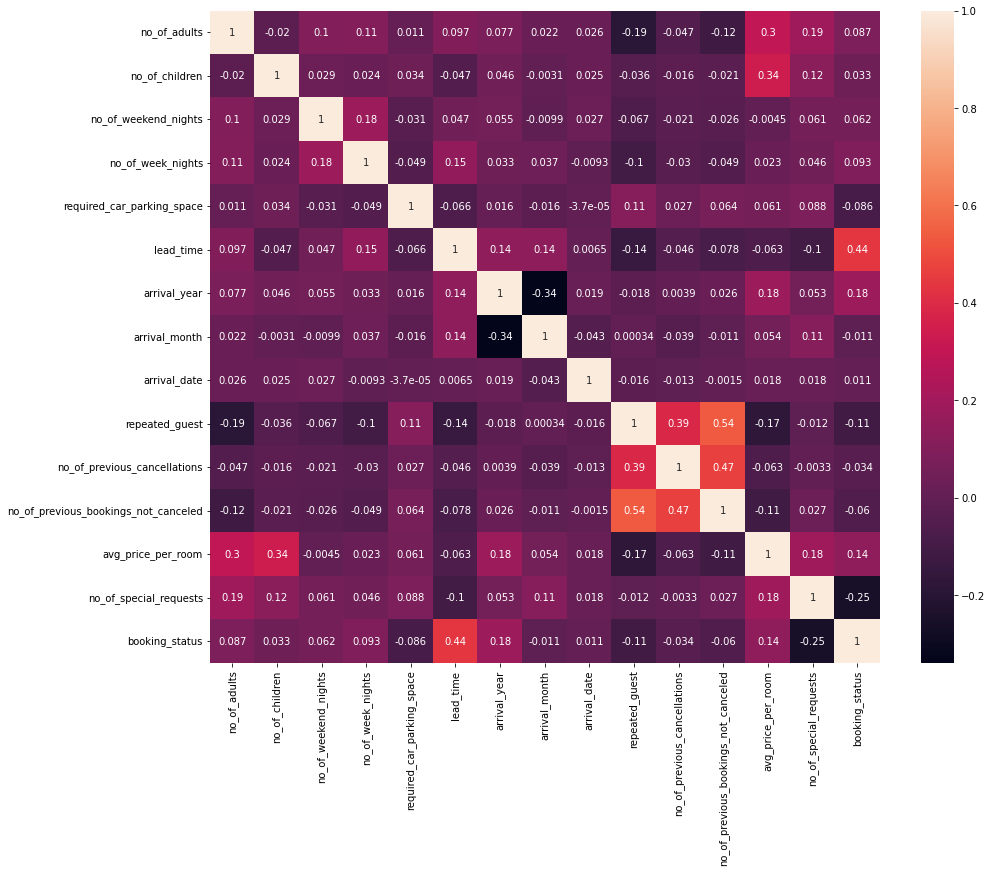

In [ ]:
# Visually representing correlations between variables
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

Observations:
- Highest correlation is between no_of_previous_bookings_not_canceled and repeated_guest
- Followed by no_of_previous_bookings_not_canceled and no_of_previous_cancellations
- lead_time and booking_status also have a notable correlation, albeit generall low

### Examining target variable and distributions wrt target

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
  """
  Function to plot distributions with respect to target variable

  data: dataframe
  predictor: independent predictor column from dataframe
  target: dependent target column from dataframe
  """
  
  fig, axs = plt.subplots(2, 2, figsize=(12, 10))

  target_uniq = data[target].unique()

  axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
  sns.histplot(
      data=data[data[target] == target_uniq[0]],
      x=predictor,
      kde=True,
      ax=axs[0, 0],
      color="teal",
      stat="density"
  )

  axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
  sns.histplot(
      data=data[data[target] == target_uniq[1]],
      x=predictor,
      kde=True,
      ax=axs[0, 1],
      color="orange",
      stat="density"
  )

  axs[1, 0].set_title("Boxplot w.r.t. target")
  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

  axs[1, 1].set_title("Boxplot (without outliers) w.r.t. target")
  sns.boxplot(
      data=data,
      x=target,
      y=predictor,
      ax=axs[1, 1],
      showfliers=False,
      palette="gist_rainbow"
  )

  plt.tight_layout()
  plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
  """
  Function to plot a stacked bar chart with category counts
  
  data: dataframe
  predictor: independent predictor column from dataframe
  target: dependent target column from dataframe
  """

  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
      by=sorter, ascending=False
  )
  print(tab1)
  print("-"*100)
  tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
      by=sorter, ascending=False
  )
  tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
  plt.legend(
      loc="lower left", frameon=False
  )
  plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
  plt.show()

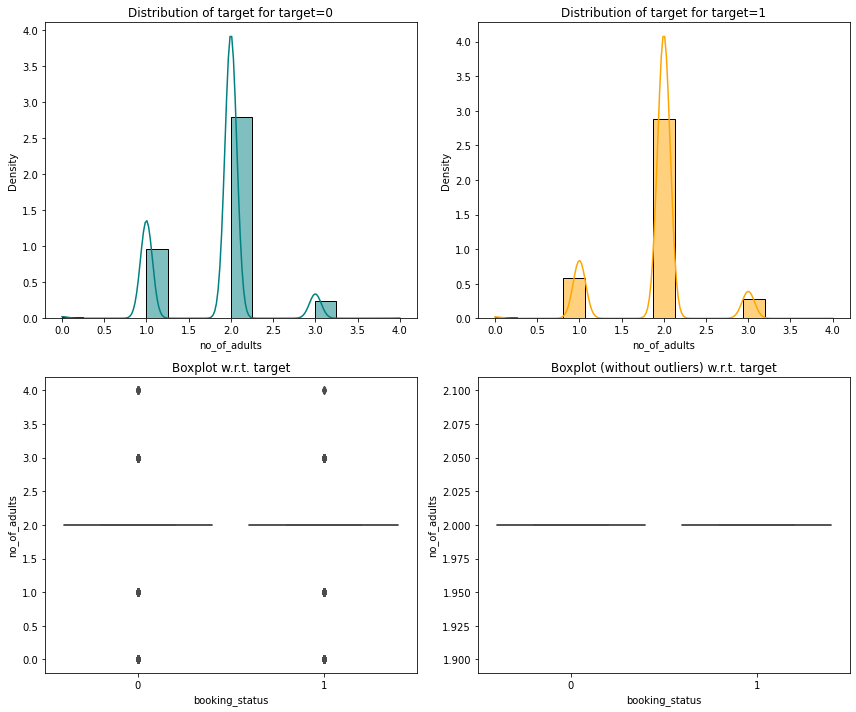

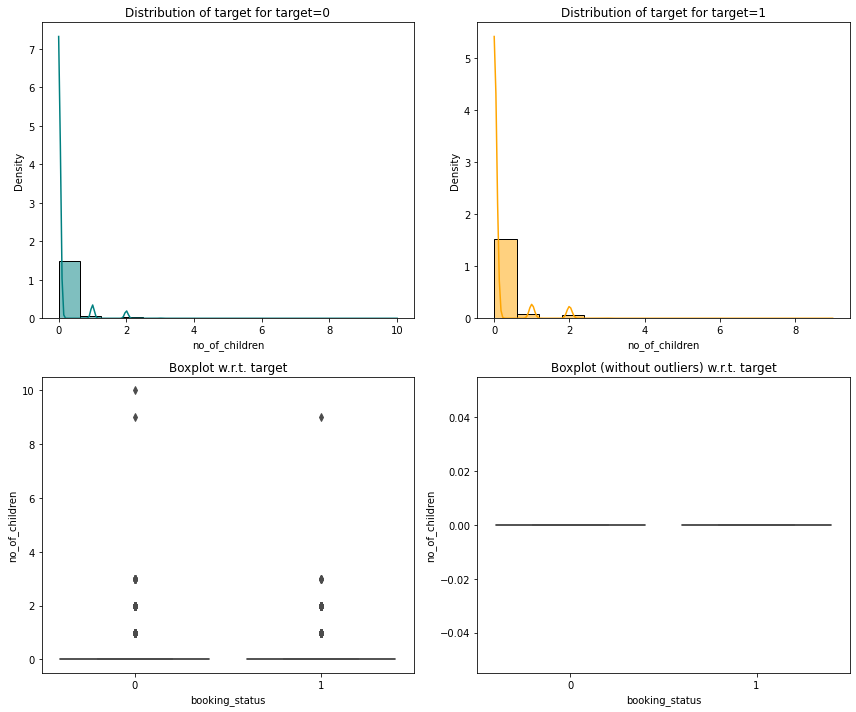

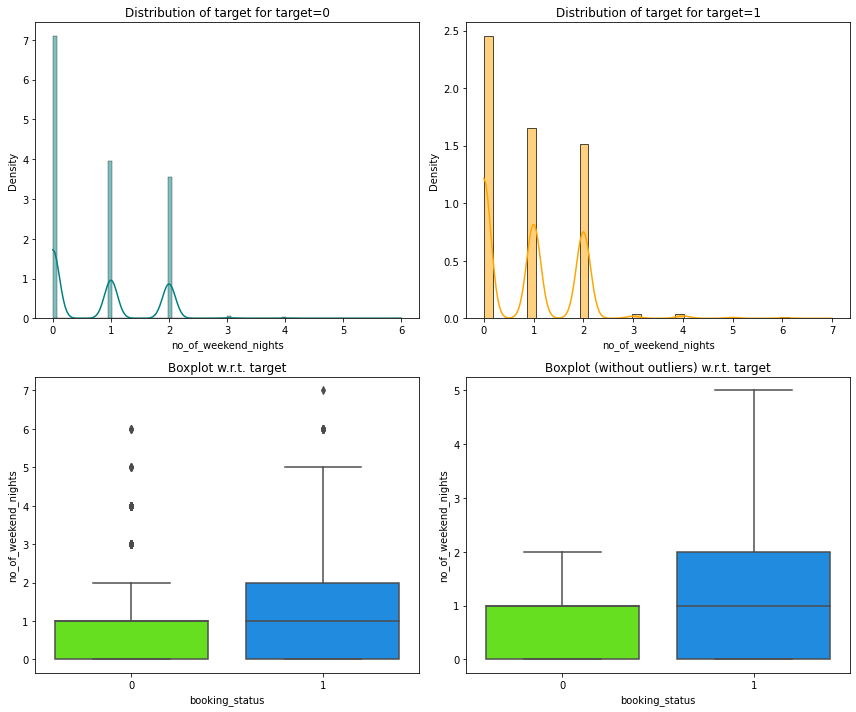

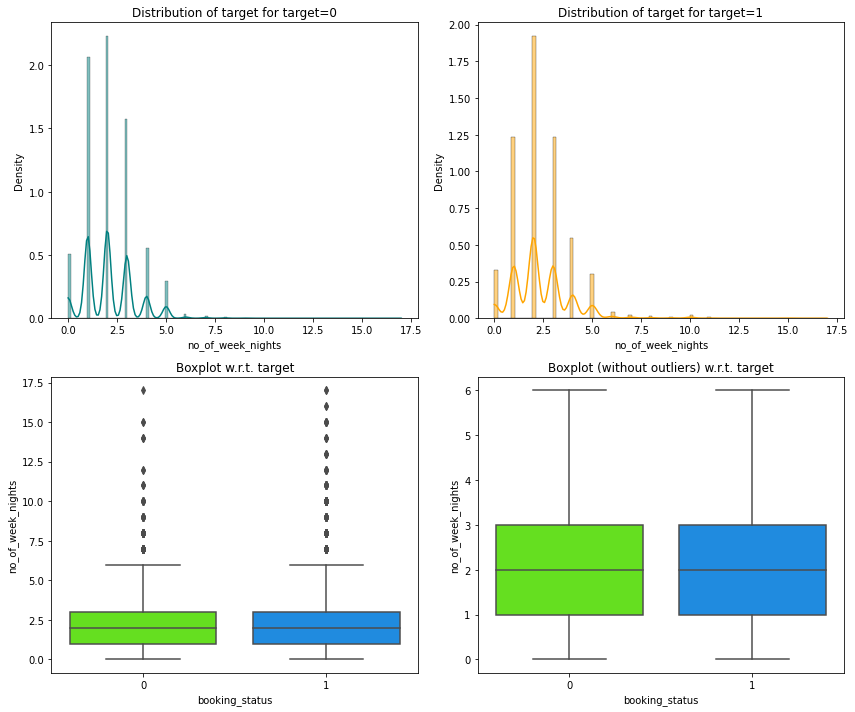

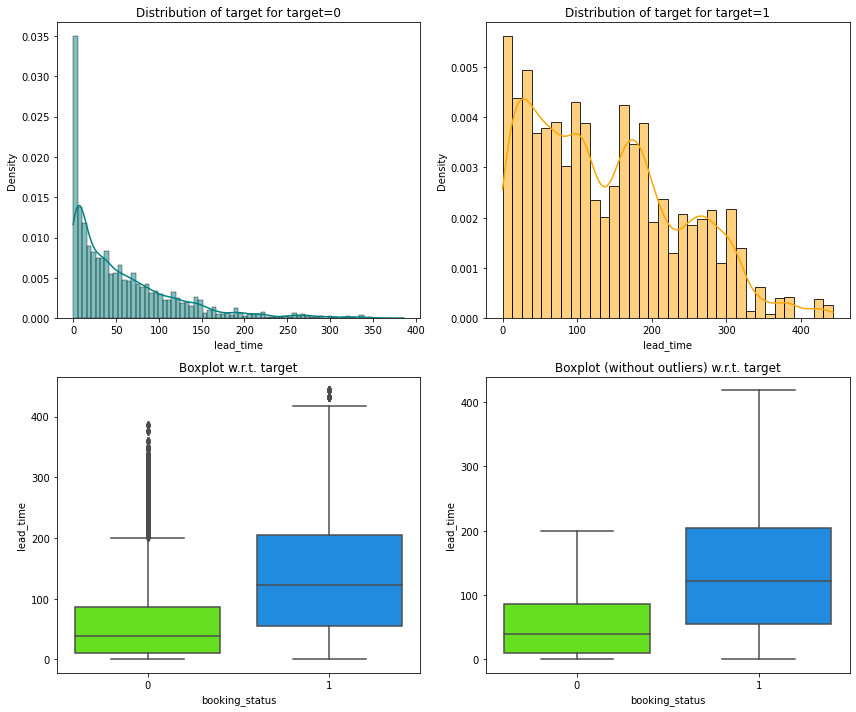

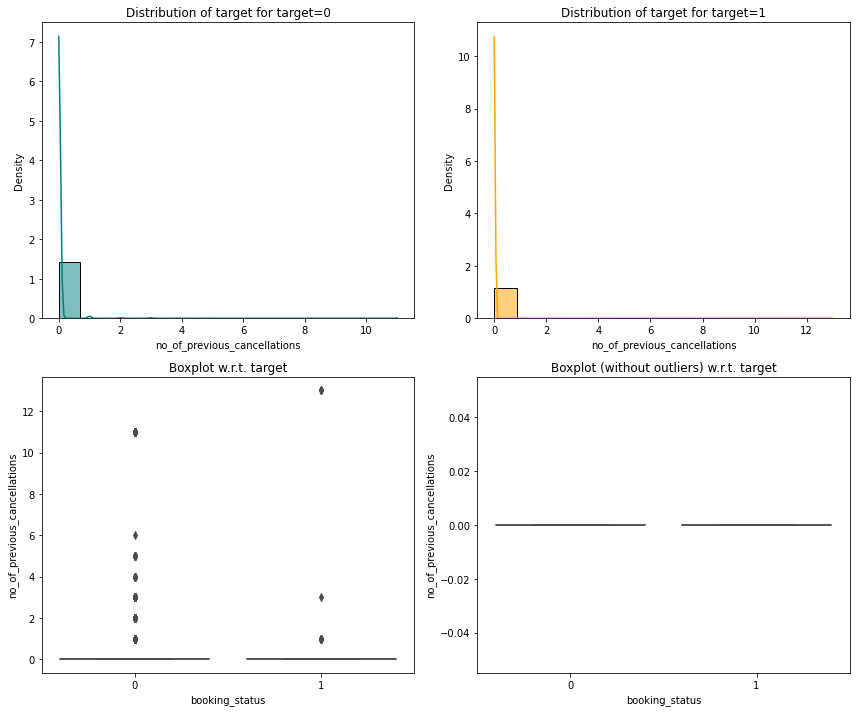

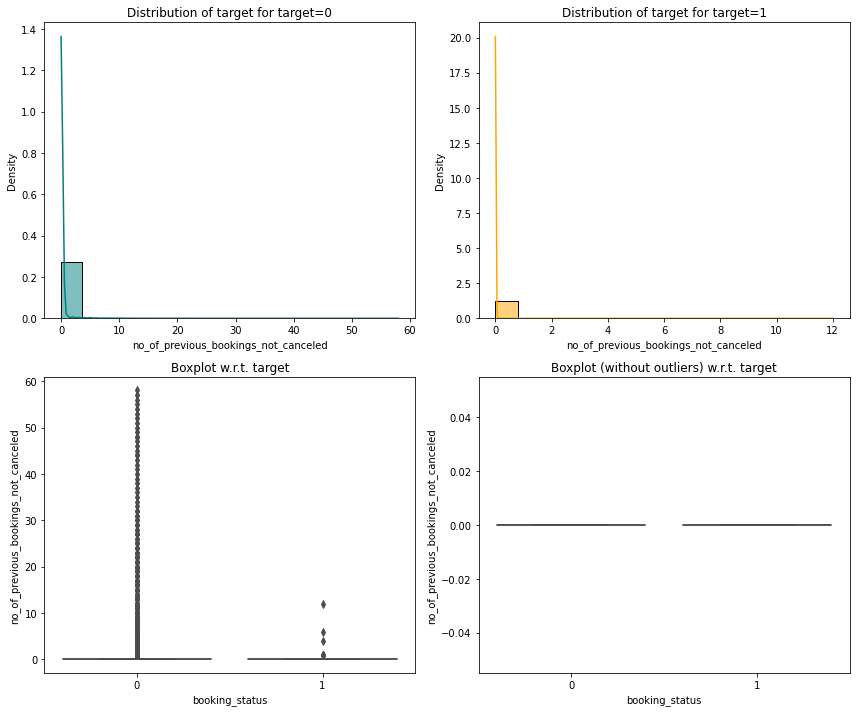

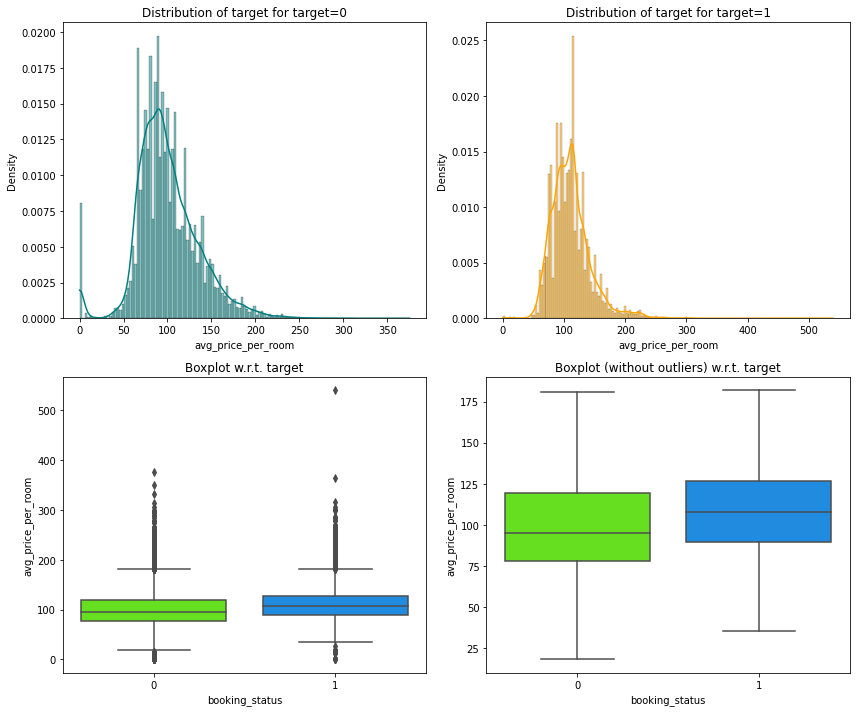

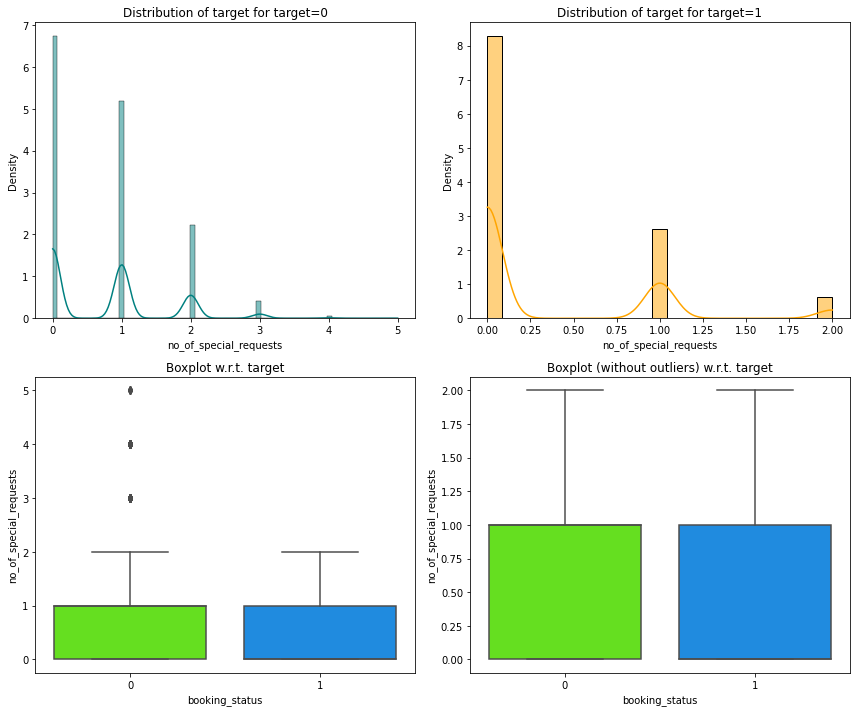

In [ ]:
# Looping through columns to create distributions against target for observations
for col in num_cols:
  distribution_plot_wrt_target(data, col, "booking_status")

Observations:
- Variables still maintain their previous distribution, even w.r.t. target
- Rate of cancellation when no_of_weekend_nights is high seems to be higher relative to when not cancelled
- lead_time also tends to be higher when booking is canceled
- avg_price_per_room also tends to be slightly higher when canceled than if not canceled

booking_status          0       1
type_of_meal_plan                
Meal Plan 2       0.54433 0.45567
Not Selected      0.66881 0.33119
Meal Plan 1       0.68820 0.31180
Meal Plan 3       0.80000 0.20000
----------------------------------------------------------------------------------------------------


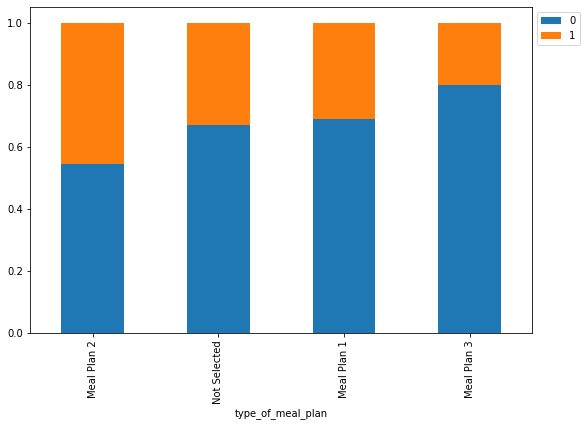

booking_status                   0       1
required_car_parking_space                
0                          0.66513 0.33487
1                          0.89858 0.10142
----------------------------------------------------------------------------------------------------


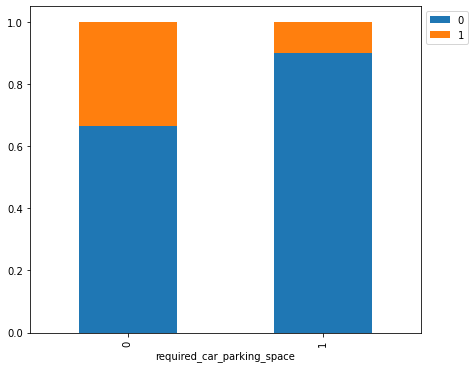

booking_status           0       1
room_type_reserved                
Room_Type 6        0.57971 0.42029
Room_Type 4        0.65841 0.34159
Room_Type 2        0.67052 0.32948
Room_Type 1        0.67750 0.32250
Room_Type 3        0.71429 0.28571
Room_Type 5        0.72830 0.27170
Room_Type 7        0.77215 0.22785
----------------------------------------------------------------------------------------------------


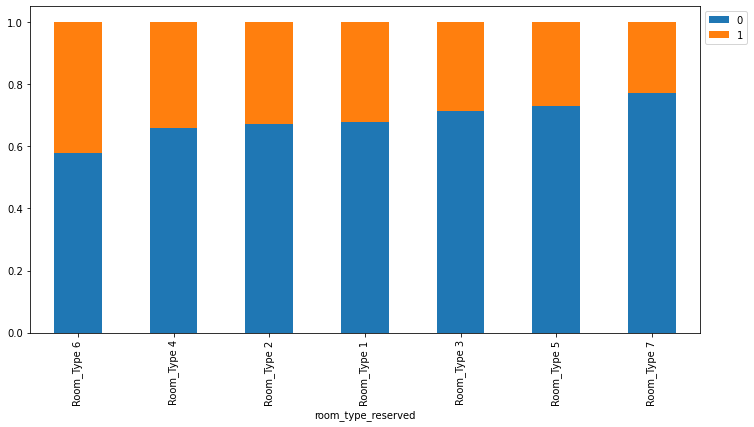

booking_status       0       1
arrival_year                  
2018           0.63294 0.36706
2017           0.85247 0.14753
----------------------------------------------------------------------------------------------------


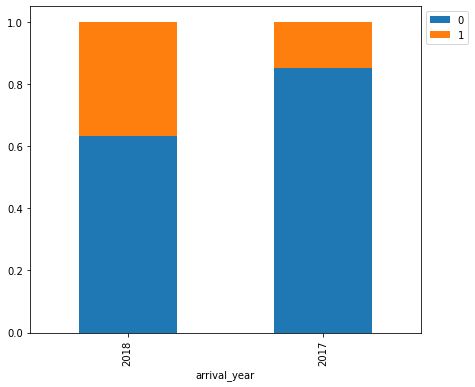

booking_status       0       1
arrival_month                 
7              0.55000 0.45000
6              0.59694 0.40306
8              0.60976 0.39024
5              0.63510 0.36490
4              0.63633 0.36367
10             0.64642 0.35358
9              0.66645 0.33355
3              0.70314 0.29686
11             0.70638 0.29362
2              0.74765 0.25235
12             0.86693 0.13307
1              0.97633 0.02367
----------------------------------------------------------------------------------------------------


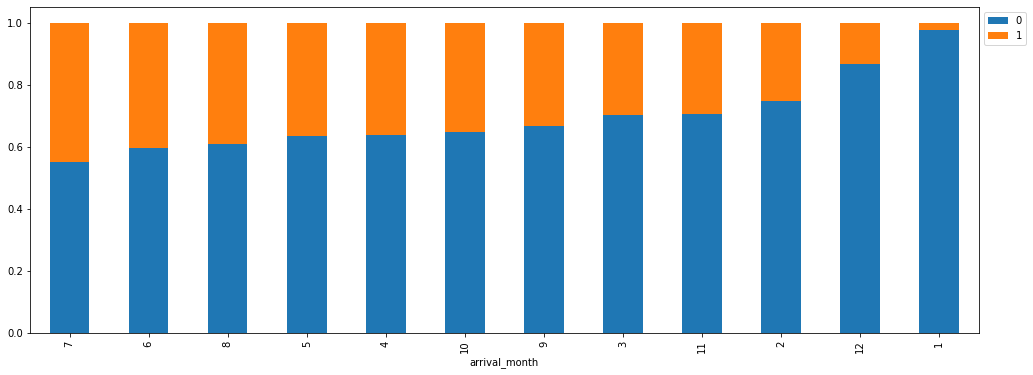

booking_status       0       1
arrival_date                  
15             0.57738 0.42262
1              0.58959 0.41041
30             0.61760 0.38240
12             0.61794 0.38206
26             0.62914 0.37086
3              0.63297 0.36703
16             0.63783 0.36217
28             0.64128 0.35872
4              0.64280 0.35720
6              0.65122 0.34878
25             0.65532 0.34468
23             0.65556 0.34444
22             0.65689 0.34311
24             0.66274 0.33726
17             0.66691 0.33309
7              0.67207 0.32793
21             0.67530 0.32470
20             0.67760 0.32240
19             0.68877 0.31123
31             0.69204 0.30796
11             0.69945 0.30055
13             0.69956 0.30044
8              0.70284 0.29716
27             0.70444 0.29556
10             0.70799 0.29201
18             0.70952 0.29048
5              0.71577 0.28423
29             0.71933 0.28067
14             0.73671 0.26329
9              0.73982 0.26018
2       

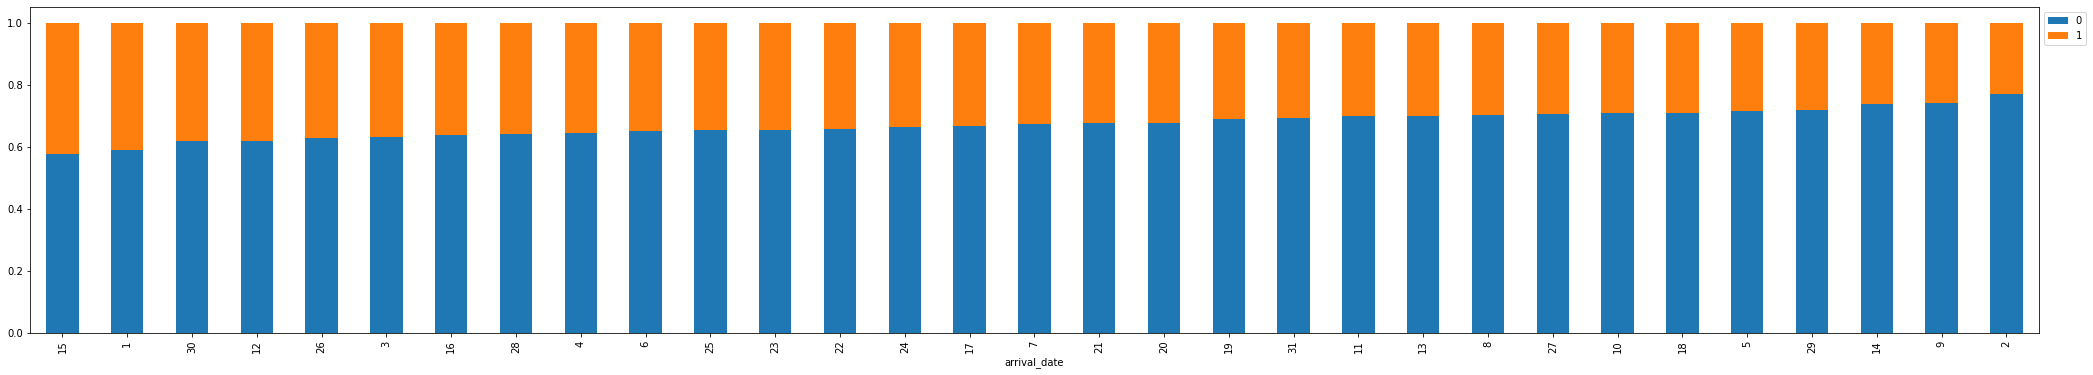

booking_status            0       1
market_segment_type                
Online              0.63492 0.36508
Offline             0.70051 0.29949
Aviation            0.70400 0.29600
Corporate           0.89093 0.10907
Complementary       1.00000 0.00000
----------------------------------------------------------------------------------------------------


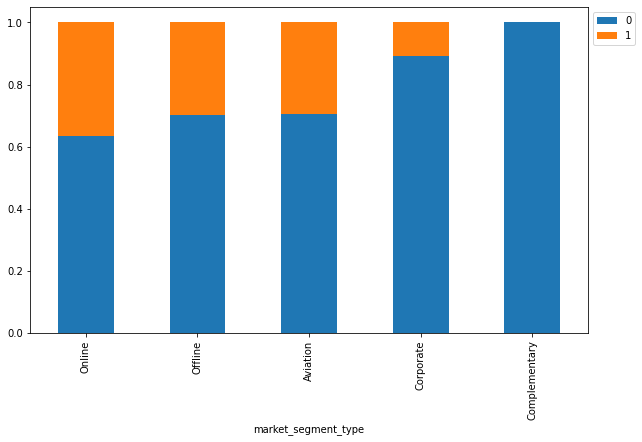

booking_status       0       1
repeated_guest                
0              0.66420 0.33580
1              0.98280 0.01720
----------------------------------------------------------------------------------------------------


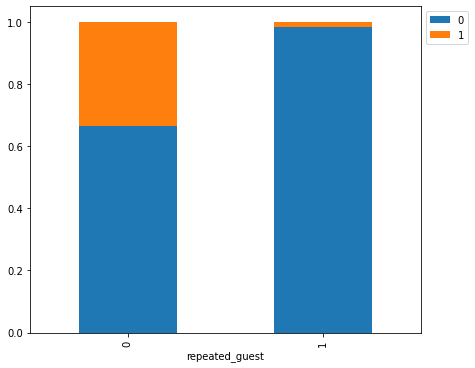

In [ ]:
# Looping through categorical columns to create stacked barplot against target with category counts
for col in cat_cols:
  if col != "booking_status":
    stacked_barplot(data, col, "booking_status")
  else:
    break

Observations:
- type_of_meal_plan: Highest instance of cancellation was among meal plan 2, with 46% cancellations. Highest instance of booking being kept was with meal plan 3, at 80%.
- required_car_parking_space: Highest instance of booking being kept was with those who needed a car parking space. For those not using car parking space, booking was canceled 33% of the time.
- room_type_reserved: Highest instance of cancellation happened when room was type 6, while highest instance of booking being kept was when room was type 7.
- arrival_year: highest instance of cancellation was in 2018 at 37%
- arrival_month: highest instance of cancellation was in July (45%), while highest instance of booking holding was in January (98%)
- arrival_date: highest instance of cancellation was on 15th day of month (42%), while highest instance of booking holding was on 2nd day of month (77%)
- market_segment_type: highest instance of cancellation was in online bookings (37%), while highest instance of booking holding was in complementary bookings (100%)
- repeated_guest: highest instance of cancellation was when it was not a repeat guest (34%)

In [ ]:
# Answering Question #1: What are the busiest months in the hotel?
data['arrival_month'].value_counts().head()

10    5317
9     4611
8     3813
6     3203
12    3021
Name: arrival_month, dtype: int64

The busiest months for the hotel are October, September, August, June, and December.

In [ ]:
# Answering Question #2: Which market segment do most of the guests come from?
data['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
(data['market_segment_type'].value_counts()[0] / data.shape[0]) * 100

63.994486560992414

Most of the guests are online customers, with 23,214 occurences in the dataframe accounting for 64% of the sample.

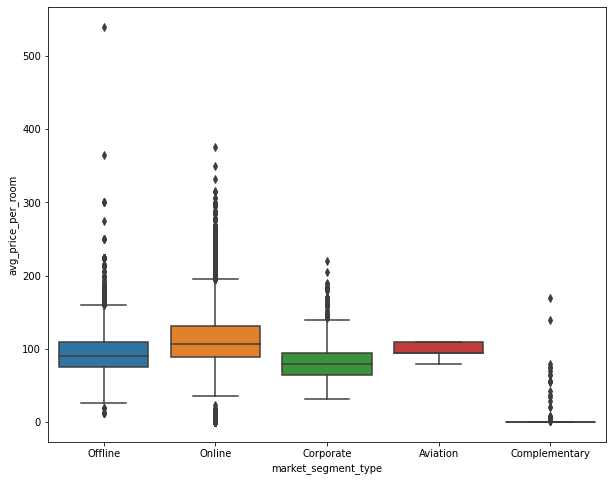

In [ ]:
# Answering Question #3: Hotel rates are dynamic and change according to demand and customer demographics.
# What are the differences in room prices in different market segments?
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room')
plt.show()

The market segment with the highest median average price per room is "online", followed closely by "aviation" and "offline". While "offline" holds the highest price entry, "online" has the highest median, 75th quartile and consistent higher outlier values out of the segments.

In [ ]:
# Answering Question #4: What percentage of bookings are canceled?
(data['booking_status'].value_counts()[1] / data.shape[0]) * 100

32.76361130254997

About 33% of bookings in the sample are canceled.

In [ ]:
# Answering Question #5: Repeating guests are the guests who stay in the hotel often and are important to brand equity.
# What percentage of repeating guests cancel?
data.groupby(['repeated_guest'])['booking_status'].value_counts()

repeated_guest  booking_status
0               0                 23476
                1                 11869
1               0                   914
                1                    16
Name: booking_status, dtype: int64

In [ ]:
(16 / data.shape[0]) * 100

0.04410751206064783

Only 0.04% of repeated guests cancel.

In [ ]:
# Answering Question #6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#Hypothesis tests?!
crosstab = pd.crosstab(
  data['no_of_special_requests'], data['booking_status']
)

from scipy.stats import chi2_contingency

Ho = "Number of special requests has no effect on booking status"
Ha = "Number of special requests has an effect on booking status"

chi, p_value, dof, expected = chi2_contingency(crosstab)
print("The p-value is " + str(p_value))

if p_value < 0.05:
  print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
  print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

The p-value is 0.0
Number of special requests has an effect on booking status as the p_value (0.0) < 0.05


If booking is canceled, there are only 0-2 special requests made, while rooms with 0-5 special requests are not canceled.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
# Checking again to make sure there are no missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Based on the lack of null values and my interpretation that 0's in each numerical column are reasonable, I do not see a need to treat missing values. It is also my understanding, from the lecture videos and presentation (see Decision Trees:CART Powerpoint), that decision trees are "not influenced by the outlier/null values".

I have also seen that some rooms under market segments "complementary" and "online" have their prices as $0, but I have been advised to assume the price being 0 makes sense in these cases, so I will not treat them as missing values.

### Feature Engineering
I am electing not to do feature engineering, as the data seems very complete, and I am asked to create a model based on the given variables.

### Outlier Detection and Treatment

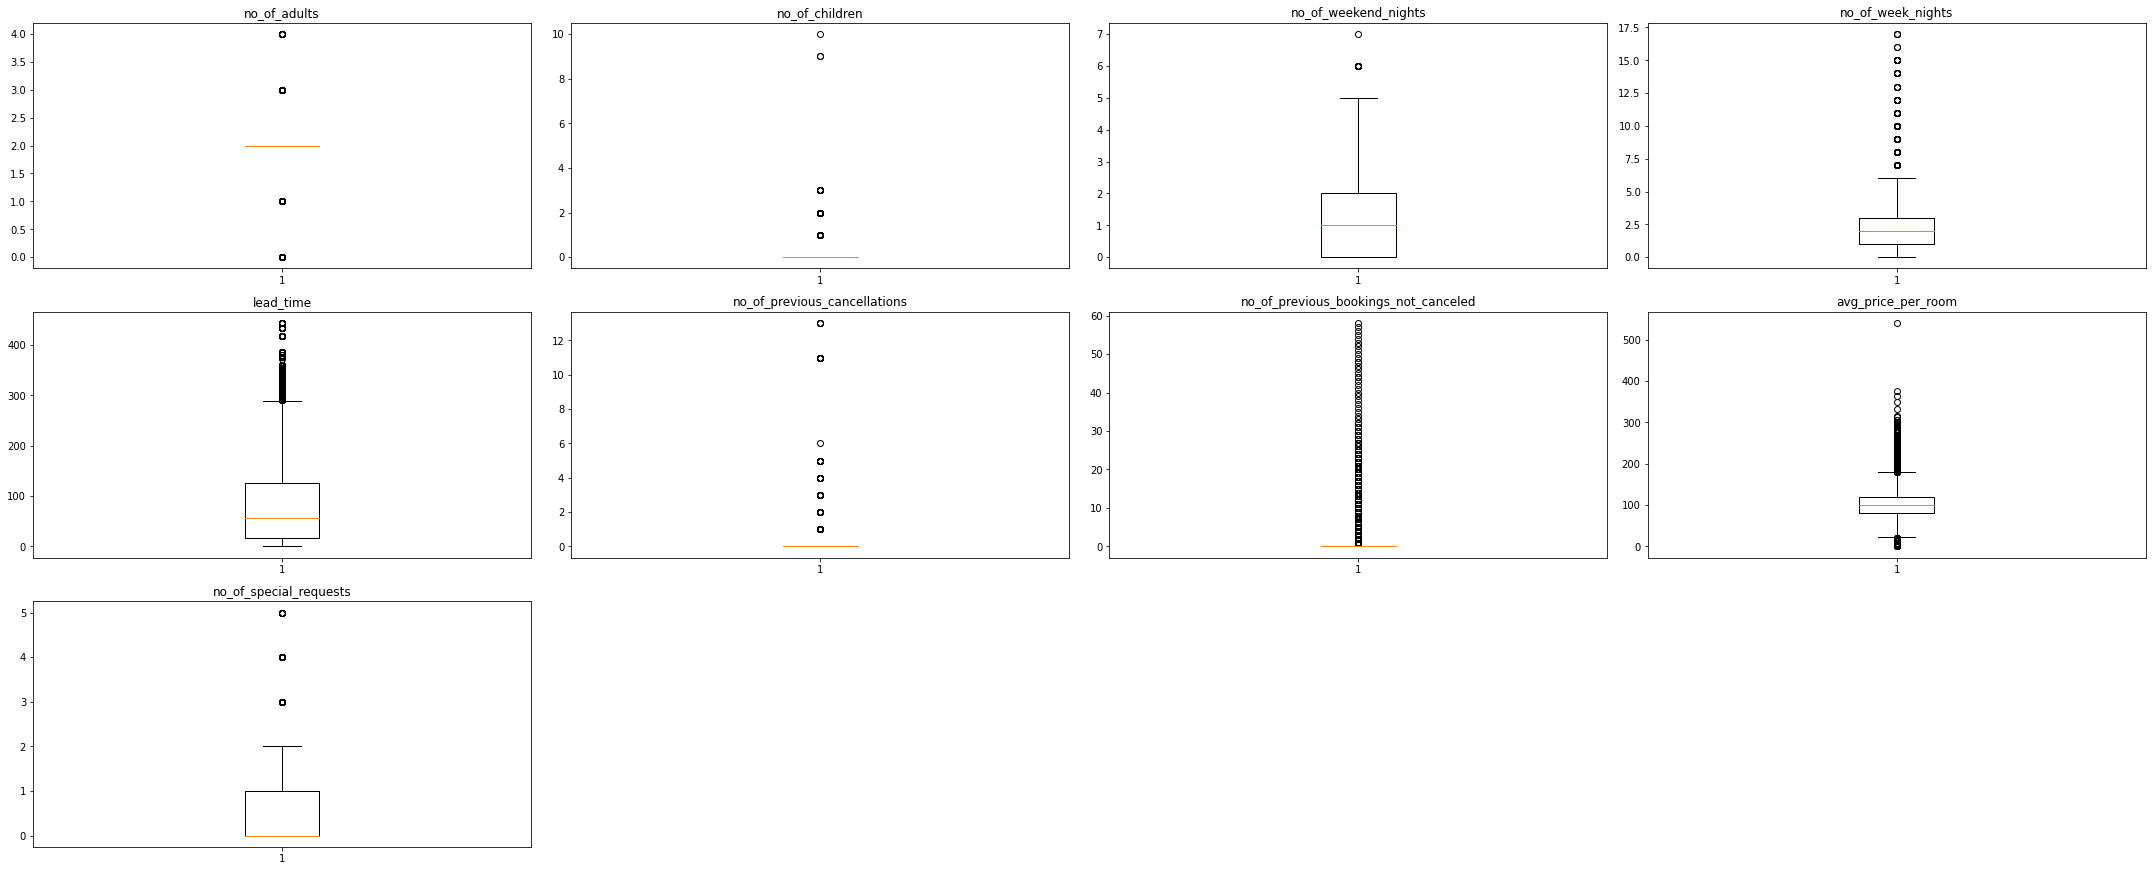

In [ ]:
# Creating boxplots for all numerical columns to examine outliers
plt.figure(figsize=(30, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# Checking number of rows in "no_of_children" affected by outliers
data[data['no_of_children'] > 8]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
6338          37          2018              1            12   
10041         11          2017             10            11   
10061          8          2017              8            13   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338               Online               0                             0   
10041           Corporate               0                             0   
10061              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                      0            84.45000   
10041                                     0            95.00000   
10061                                     0            76.50000   

       no_of_special_requests  booking_status  
6338                        1               0  
10041                       0               0  
10061                       1               1

In [ ]:
# Checking number of rows in "avg_price_per_room" affected by outliers
data[data['avg_price_per_room'] > 400]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0           540.00000   

       no_of_special_requests  booking_status  
33114                       0               1

In [ ]:
# Checking number of rows in "no_of_previous_cancellations" affected by outliers
data[data['no_of_previous_cancellations'] > 10]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
1561              2               0                     0                  1   
3322              2               0                     0                  1   
3530              2               0                     0                  1   
7110              2               0                     0                  1   
10686             2               0                     0                  2   
10890             2               0                     0                  1   
11834             2               0                     0                  2   
12097             2               0                     1                  1   
12109             2               0                     1                  1   
12554             2               0                     0                  1   
14030             2               0                     0                  2   
16277             2               0                     1                  1   
16919             1               0                     0                  2   
19779             3               0                     0                  3   
20739             1               0                     0                  1   
23792             1               0                     0                  2   
24950             2               0                     1                  0   
27499             2               0                     1                  1   
28891             2               0                     0                  1   
28914             2               0                     2                  2   
28972             1               0                     0                  1   
30363             2               0                     1                  2   
30833             2               0                     1                  1   
32148             1               0                     0                  2   
32722             2               0                     1                  2   
33760             2               0                     0                  1   
34906             2               0                     0                  3   
34909             2               0                     2                  2   
36079             1               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
1561        Meal Plan 1                           0        Room_Type 1   
3322        Meal Plan 1                           0        Room_Type 4   
3530       Not Selected                           1        Room_Type 1   
7110       Not Selected                           0        Room_Type 1   
10686      Not Selected                           0        Room_Type 1   
10890      Not Selected                           0        Room_Type 1   
11834      Not Selected                           1        Room_Type 1   
12097       Meal Plan 1                           0        Room_Type 1   
12109       Meal Plan 1                           0        Room_Type 1   
12554       Meal Plan 1                           0        Room_Type 1   
14030      Not Selected                           0        Room_Type 1   
16277       Meal Plan 1                           0        Room_Type 1   
16919       Meal Plan 1                           0        Room_Type 1   
19779       Meal Plan 1                           0        Room_Type 4   
20739       Meal Plan 1                           0        Room_Type 1   
23792       Meal Plan 1                           0        Room_Type 1   
24950       Meal Plan 1                           0        Room_Type 1   
27499       Meal Plan 1                           0        Room_Type 4   
28891      Not Selected                           0        Room_Type 1   
28914       Meal Plan 1                           0        Room_Type 4   
28972       Meal Plan 1                           0 

In [ ]:
((29 + 4) / 36275) * 100

0.09097174362508614

I notice that there are some outliers in "no_of_children", "no_of_previous_cancellations", and "avg_price_per_room". Due to the miniscule amount of rows affected by these outliers (< 0.1%), I will delete these rows to maintain the integrity of the dataset. It is my understanding from the lecture and notes that decision trees are "not influenced by outlier/null values and hence requires less data cleaning", but I have been informed that this is more of a judgment call.

In [ ]:
data.drop(data[data["no_of_children"] > 8].index, inplace=True)
data[data["no_of_children"] > 8]

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
data.drop(data[data['avg_price_per_room'] > 400].index, inplace=True)
data[data['avg_price_per_room'] > 400]

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
data.drop(data[data['no_of_previous_cancellations'] > 10].index, inplace=True)
data[data['no_of_previous_cancellations'] > 10]

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36242 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36242 non-null  int64  
 1   no_of_children                        36242 non-null  int64  
 2   no_of_weekend_nights                  36242 non-null  int64  
 3   no_of_week_nights                     36242 non-null  int64  
 4   type_of_meal_plan                     36242 non-null  object 
 5   required_car_parking_space            36242 non-null  int64  
 6   room_type_reserved                    36242 non-null  object 
 7   lead_time                             36242 non-null  int64  
 8   arrival_year                          36242 non-null  int64  
 9   arrival_month                         36242 non-null  int64  
 10  arrival_date                          36242 non-null  int64  
 11  market_segment_

All rows with outliers have been removed, and the dataset still maintains its integrity.

### Data Preparation for Modeling



In [ ]:
# Preparing to split data into train and test sets
# predictor variables
x = data.drop("booking_status", axis=1)
# target variable
y = data["booking_status"]

# Getting dummy variables for categorical columns in predictors
x = pd.get_dummies(x, drop_first=True)

# Adding intercept to data
x = sm.add_constant(x)

# Splitting x and y into train and test sets in a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)
x_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
12025 1.00000             2               0                     0   
6155  1.00000             2               0                     0   
21566 1.00000             1               0                     0   
21910 1.00000             2               0                     1   
21966 1.00000             2               1                     0   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
12025                  1                           0        113          2018   
6155                   3                           1         34          2018   
21566                  3                           0          1          2018   
21910                  1                           0        145          2018   
21966                  3                           0        178          2018   

       arrival_month  arrival_date  repeated_guest  \
12025             12             8               0   
6155              10             4               0   
21566              3             8               0   
21910             10            22               0   
21966              8            10               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
12025                             0                                     0   
6155                              0                                     0   
21566                             0                                     0   
21910                             0                                     0   
21966                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
12025            90.00000                       1   
6155            160.20000                       1   
21566            75.00000                       0   
21910           153.00000                       0   
21966           127.50000                       2   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
12025                              0                              0   
6155                               0                              0   
21566                              0                              0   
21910                              1                              0   
21966                              0                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
12025                               0                               0   
6155                                0                               0   
21566                               0                               0   
21910                               0                               0   
21966                               0                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
12025                               0                               0   
6155                                0                               1   
21566                               0                               1   
21910                               0                               0   
21966                               0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
12025                               0                               0   
6155                                0                               0   
21566                               0                               0   
21910                               0                               0   
21966                               0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
12025                               0                                  0   
6155                                0                                  0   
21566                      

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25369, 28)
Shape of test set :  (10873, 28)
Percentage of classes in training set:
0   0.67224
1   0.32776
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67222
1   0.32778
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

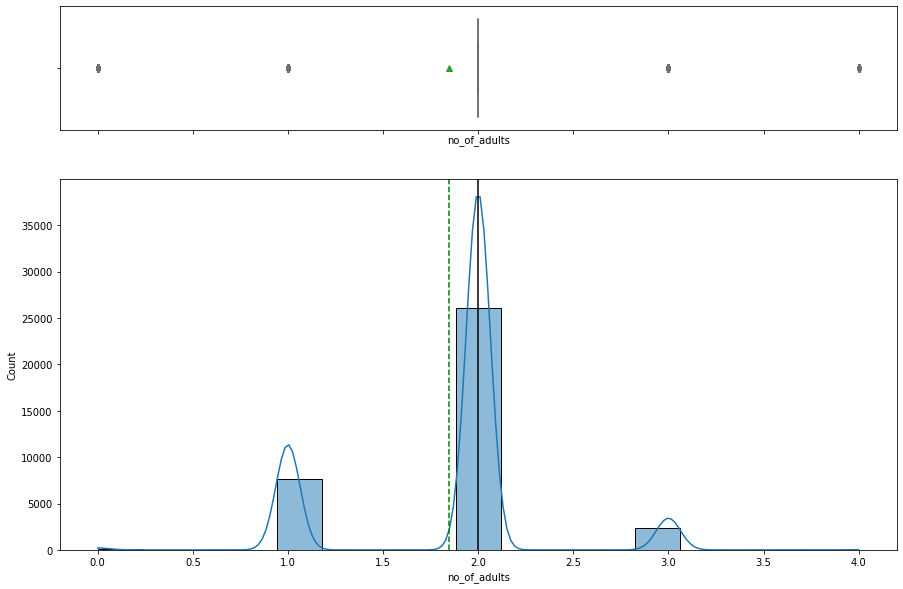

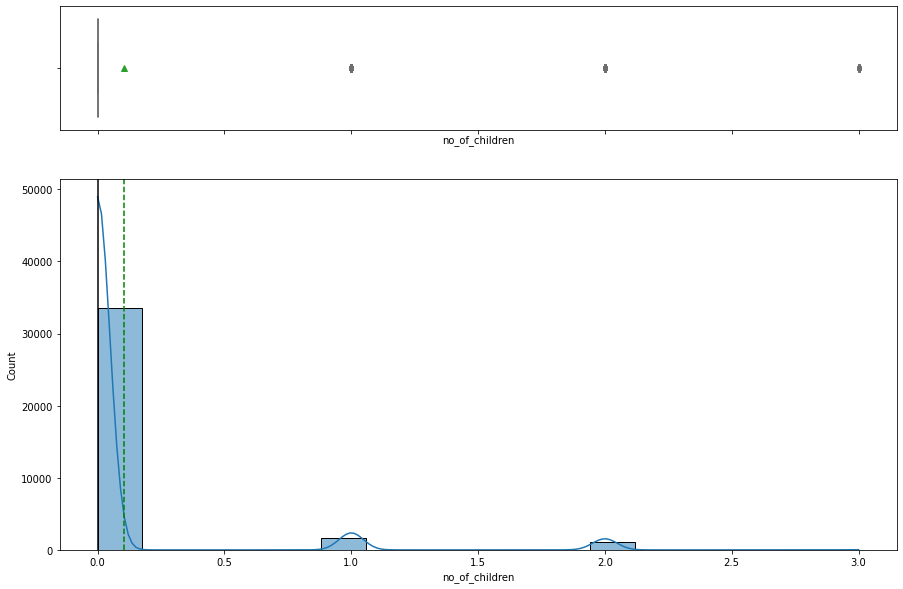

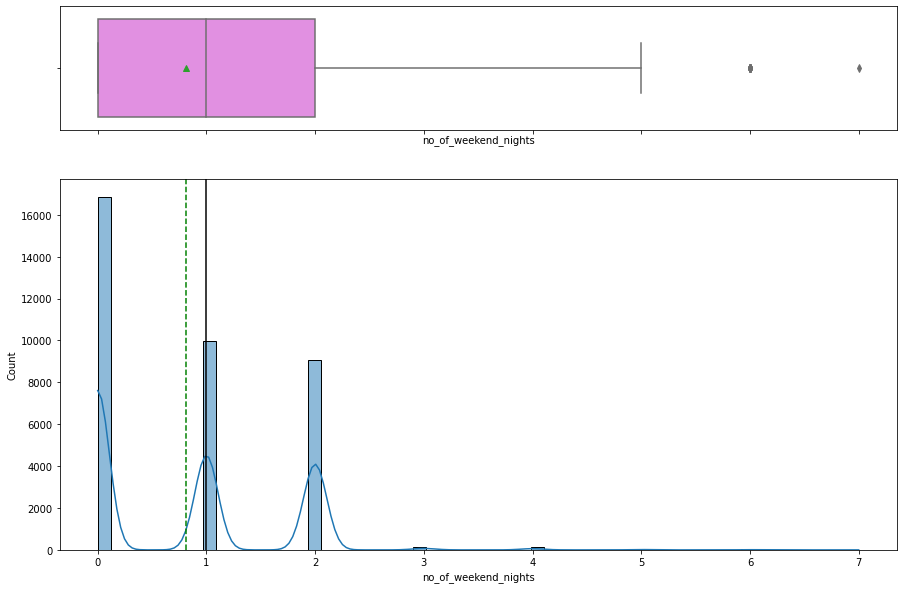

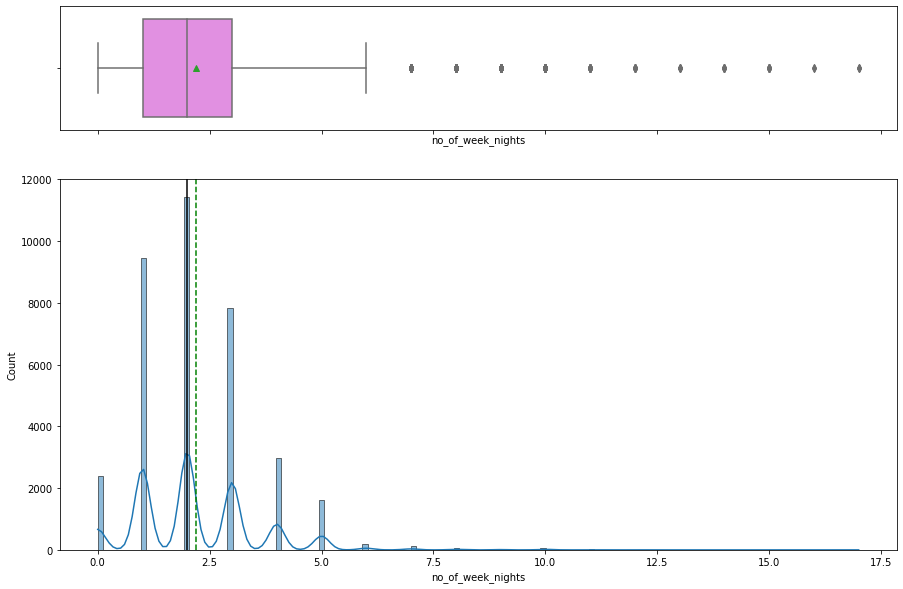

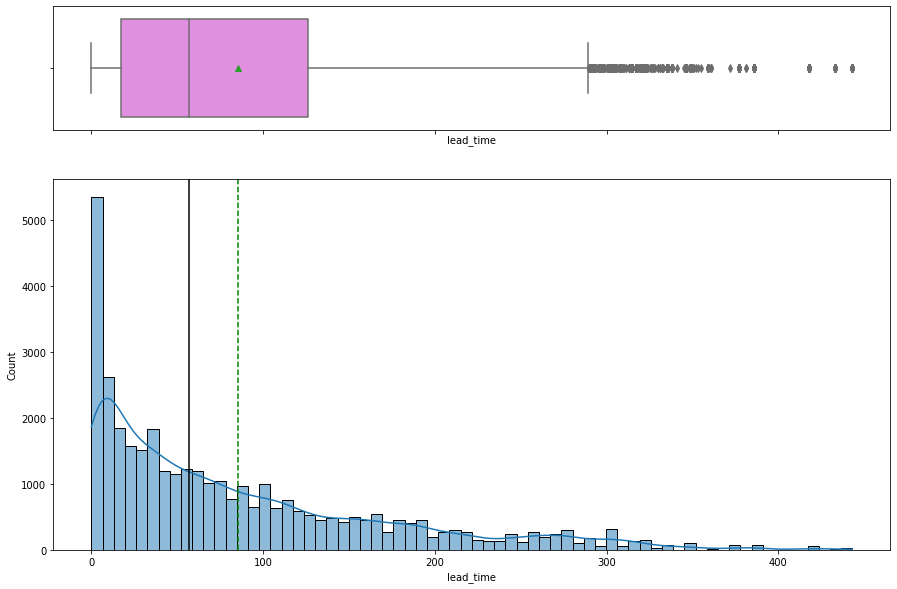

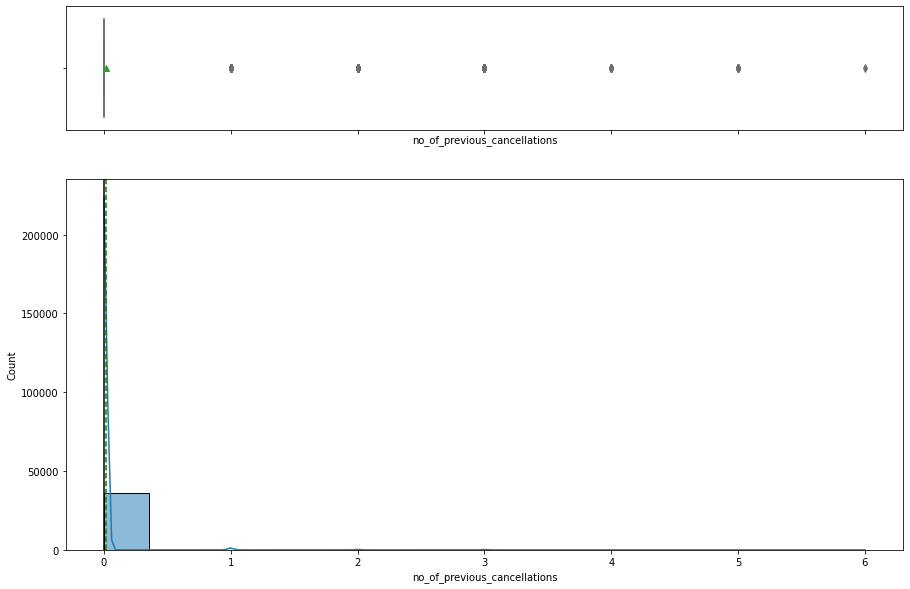

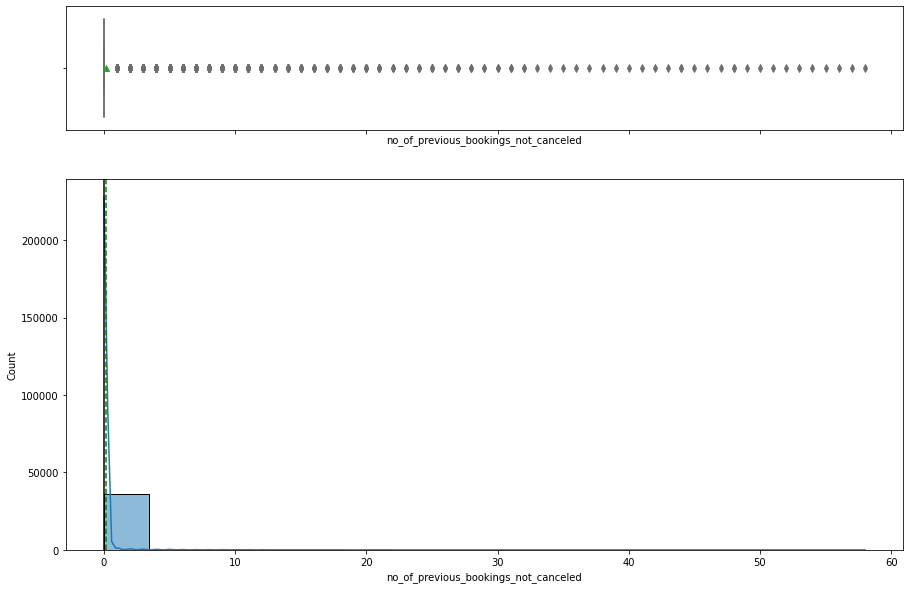

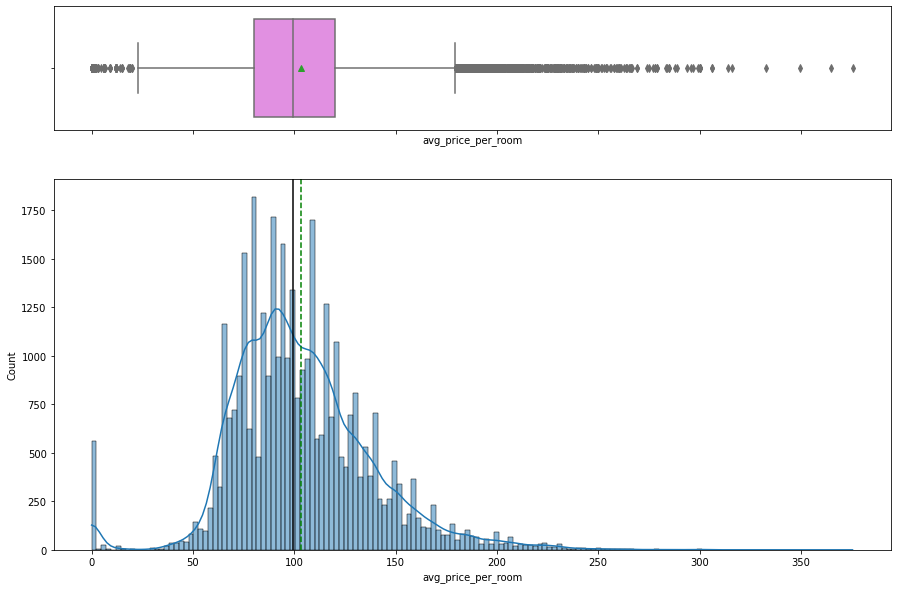

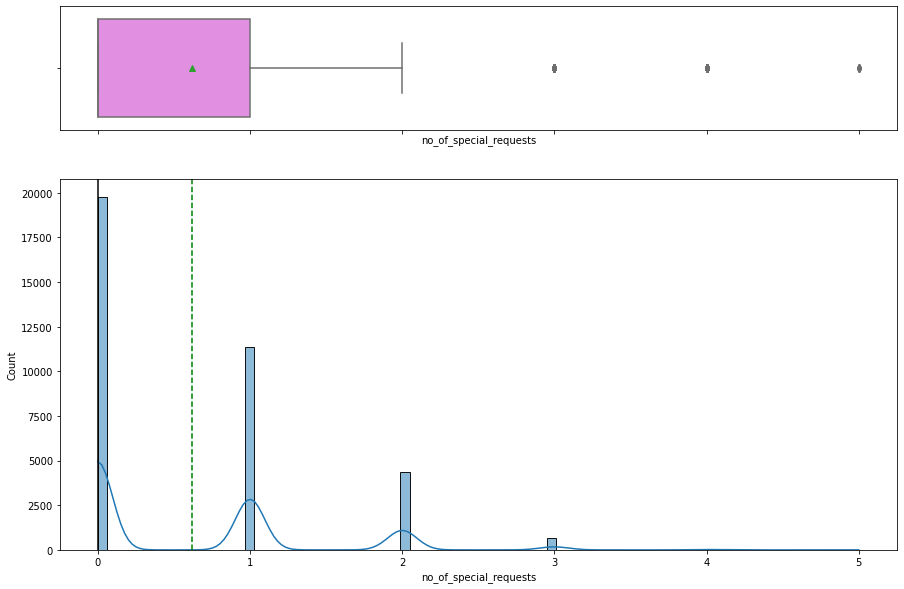

In [ ]:
# Rechecking distributions of numerical columns
for col in num_cols:
  hist_box(data, col)

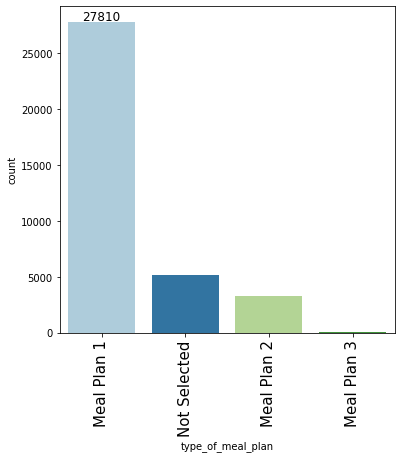

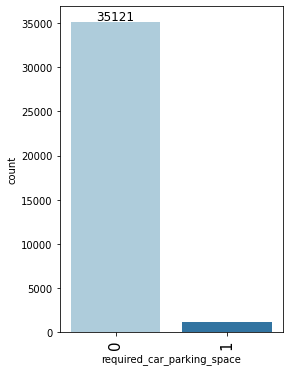

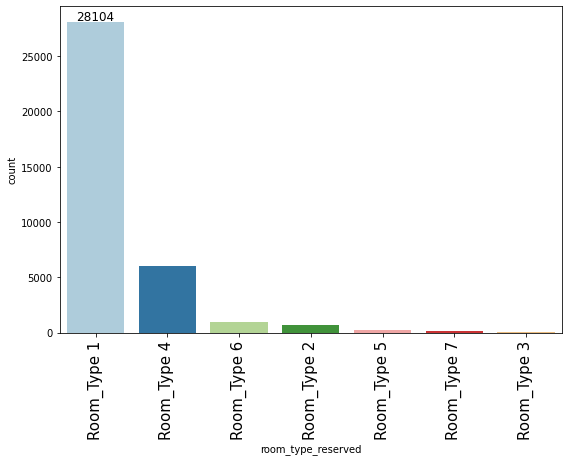

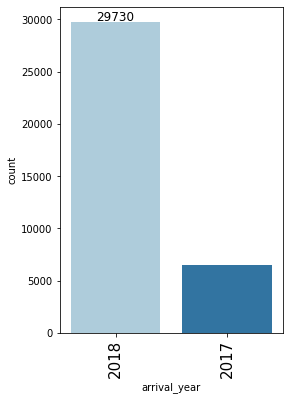

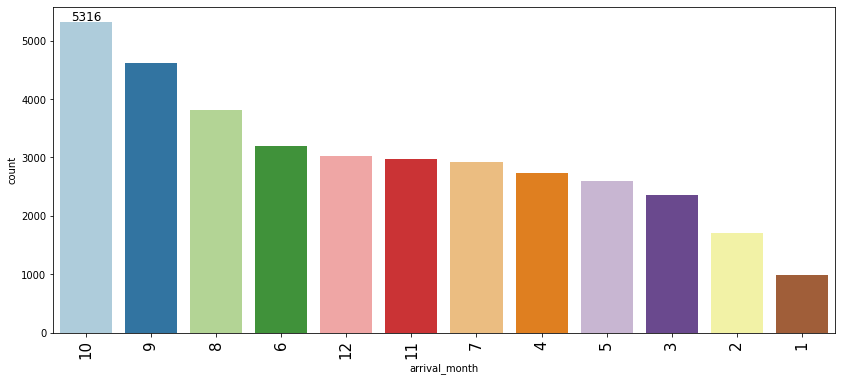

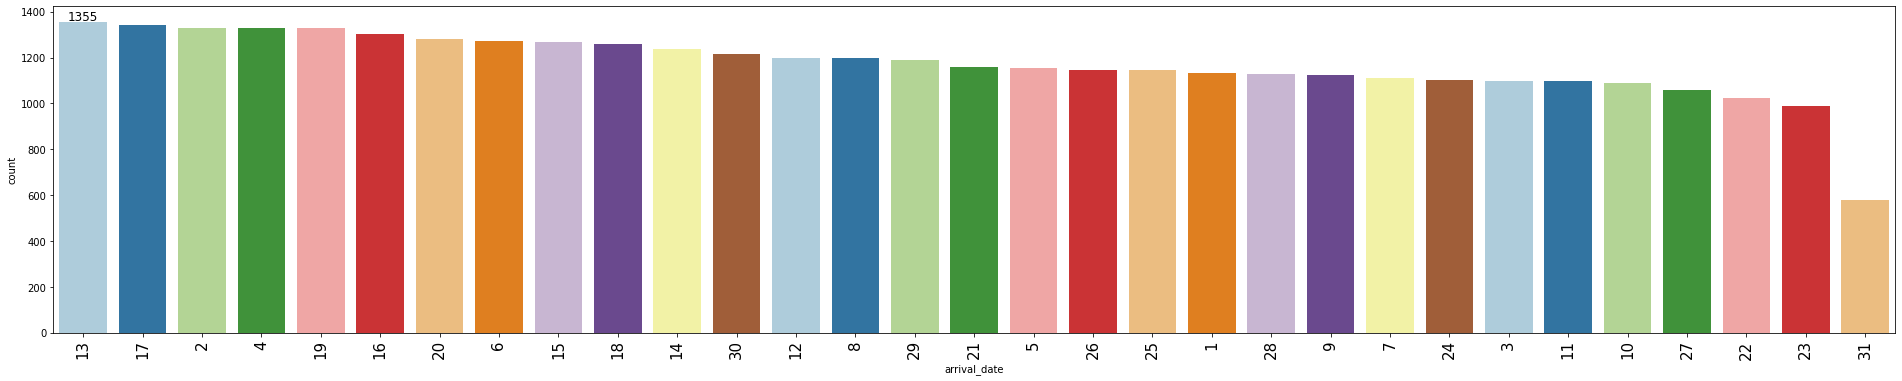

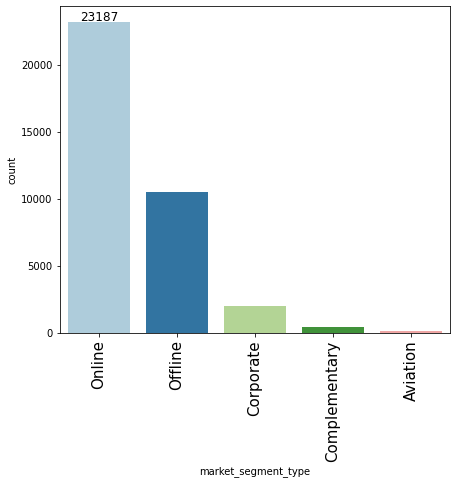

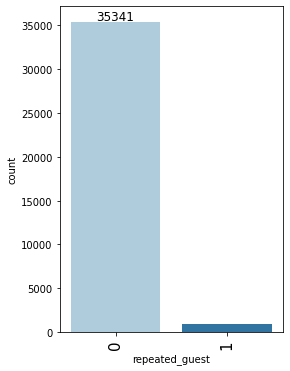

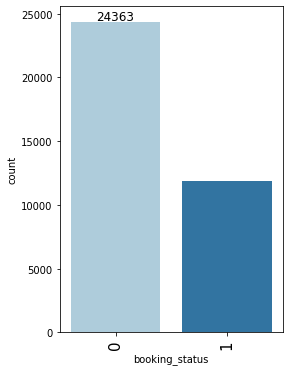

In [ ]:
# Rechecking distributions of categorical columns
for col in cat_cols:
  labeled_barplot(data, col)

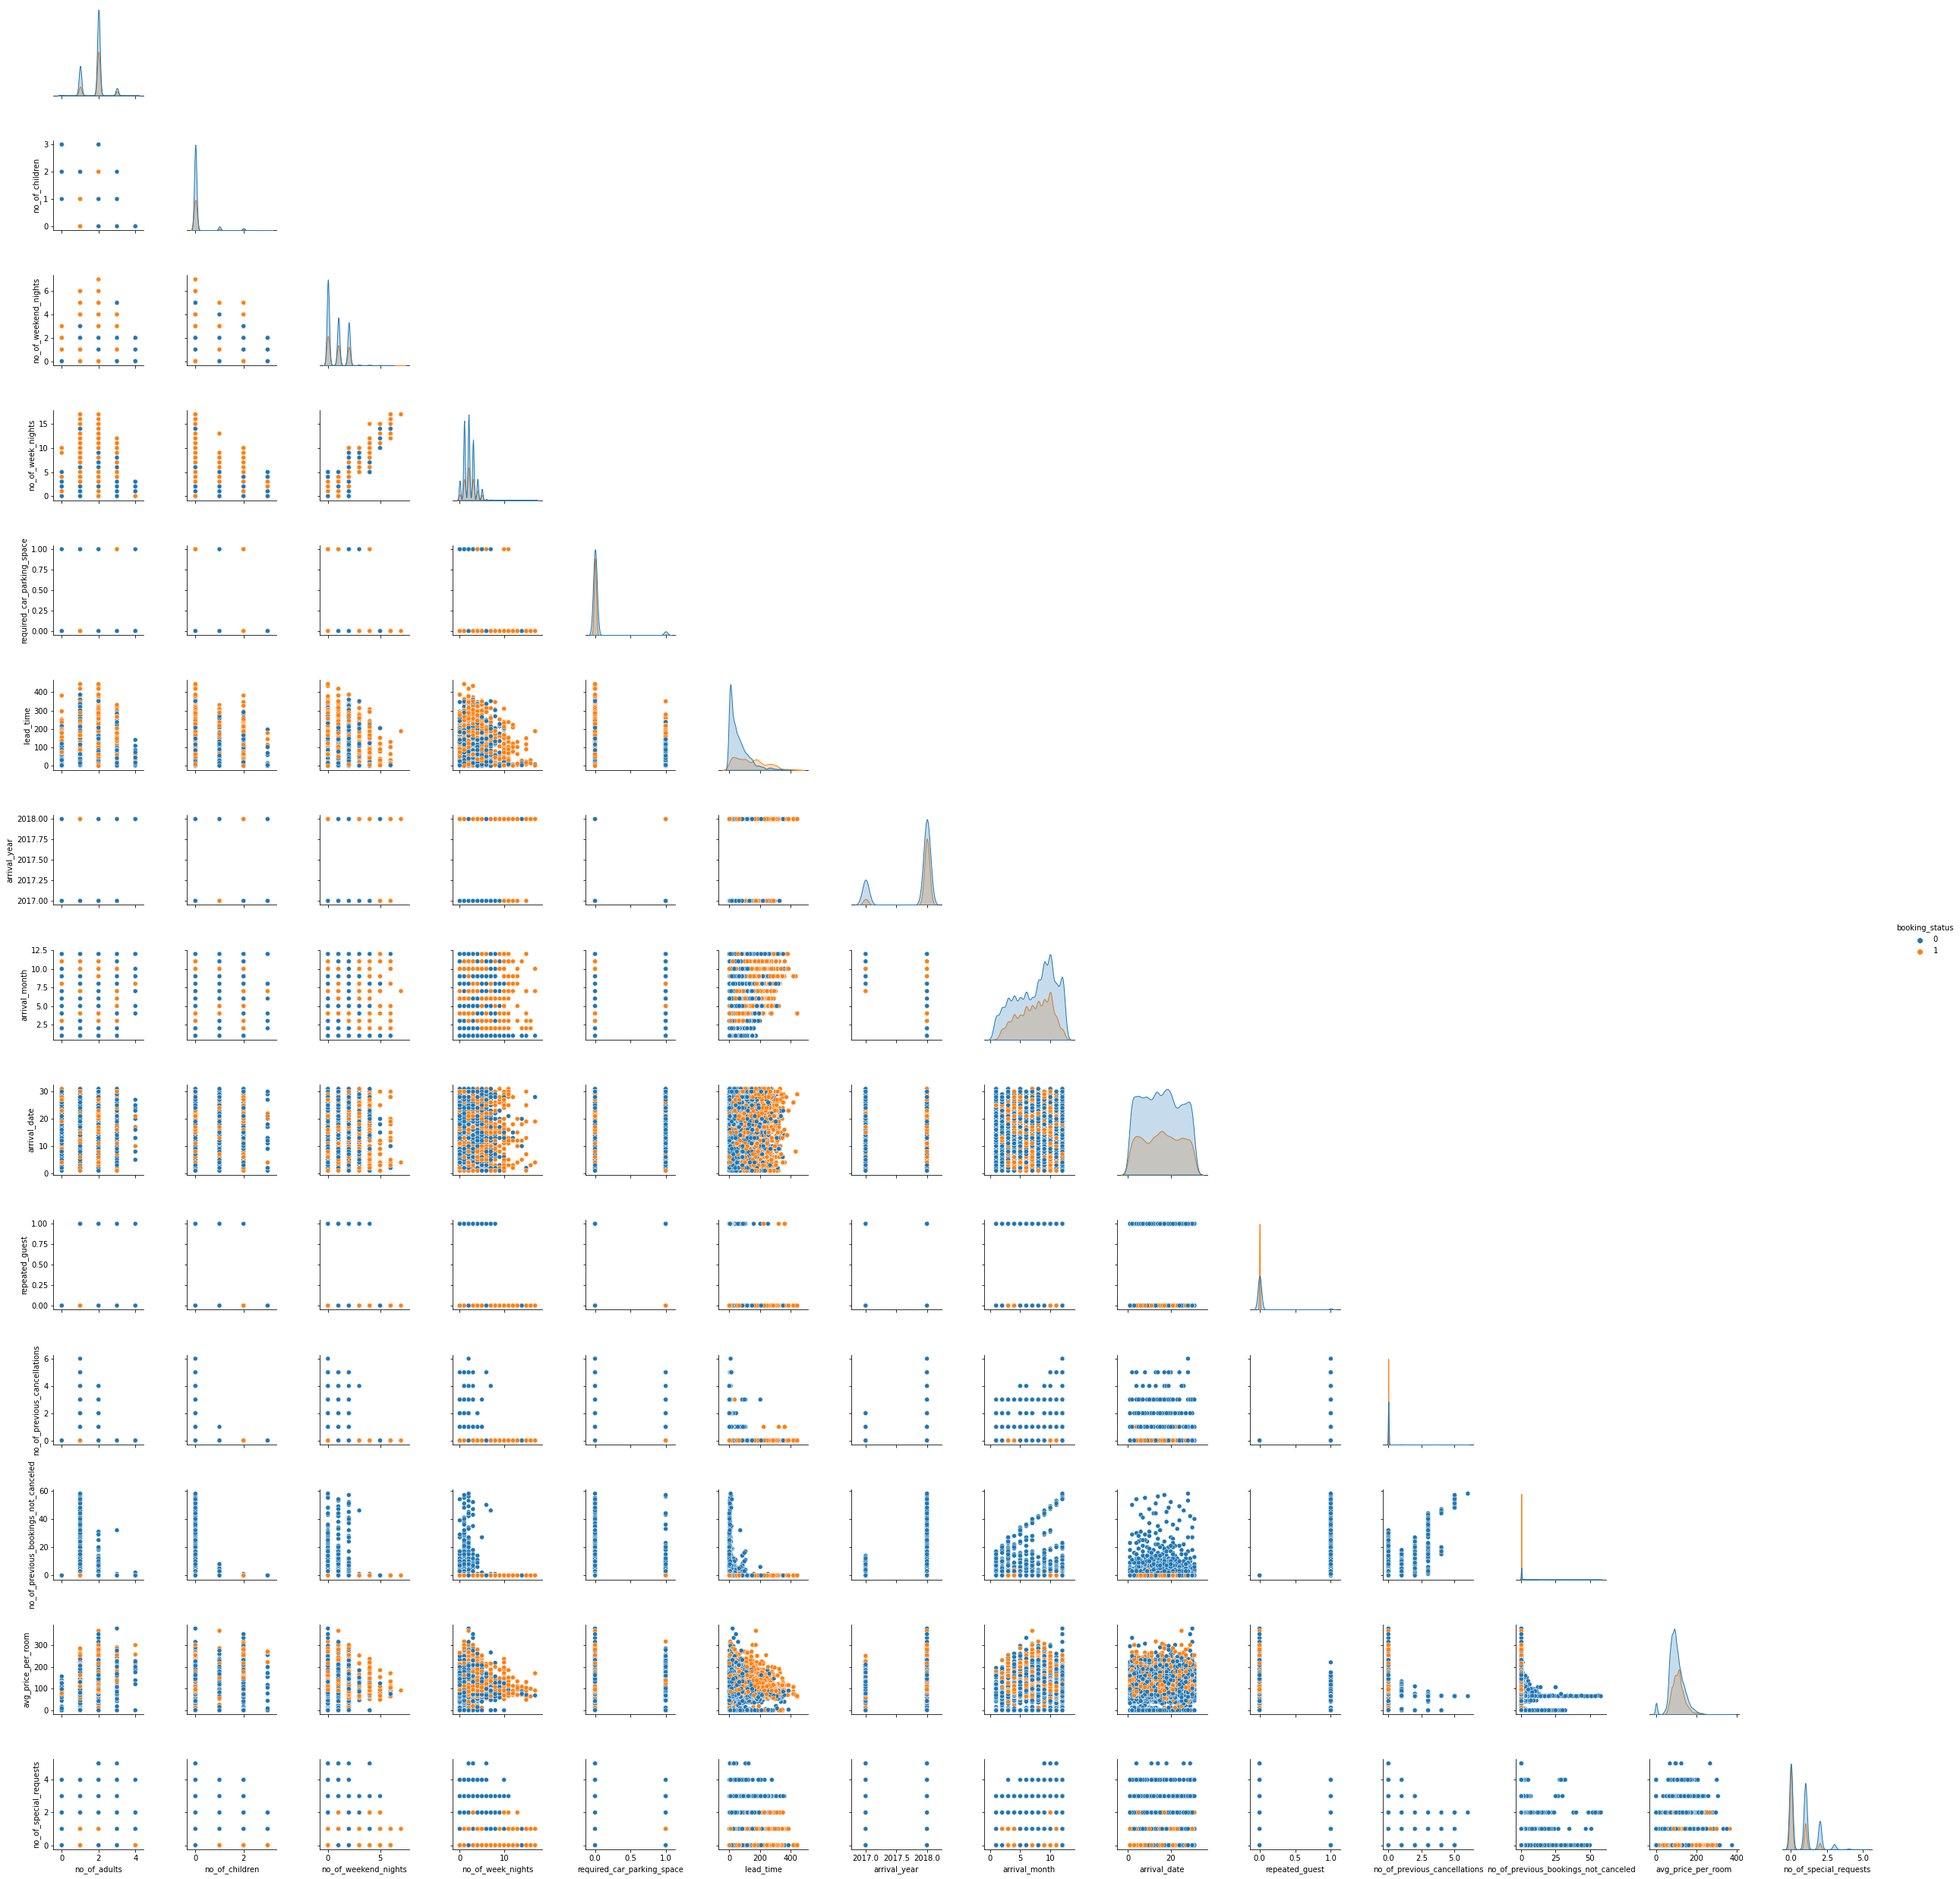

In [ ]:
# Rechecking paired scatterplot correlations between variables
sns.pairplot(data, hue="booking_status", diag_kind="kde", corner=True)
plt.show()

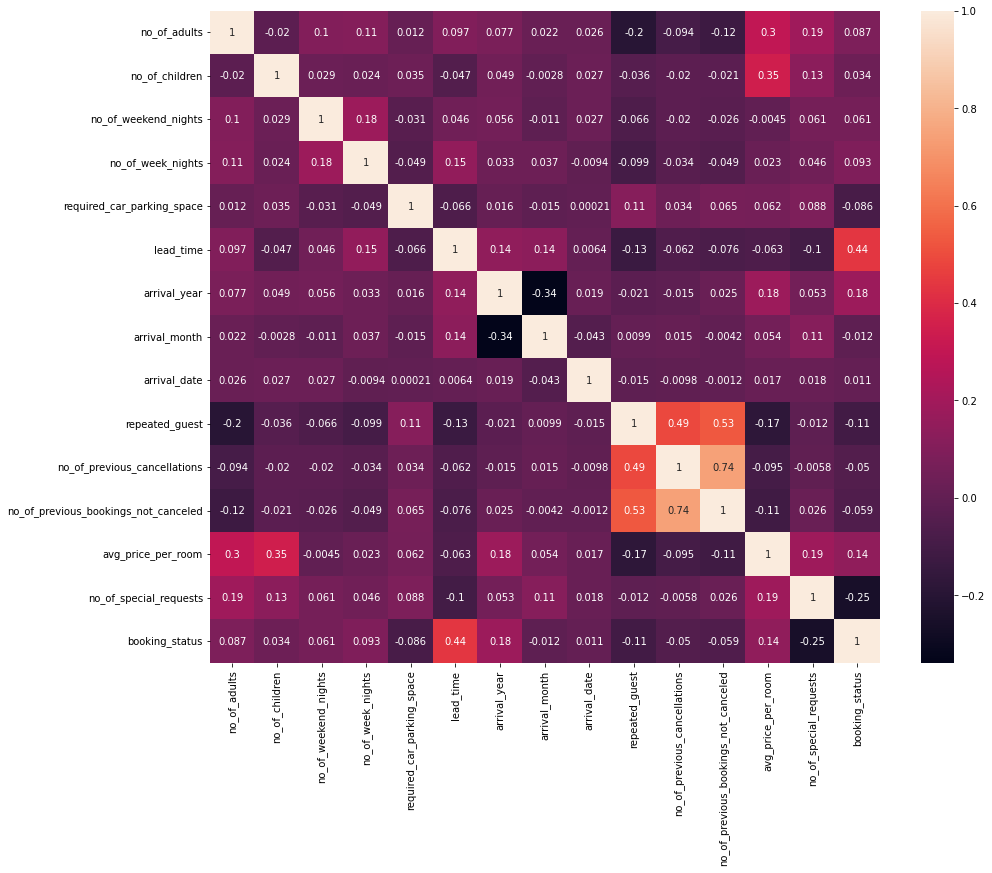

In [ ]:
# Rechecking visual correlations between variables
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

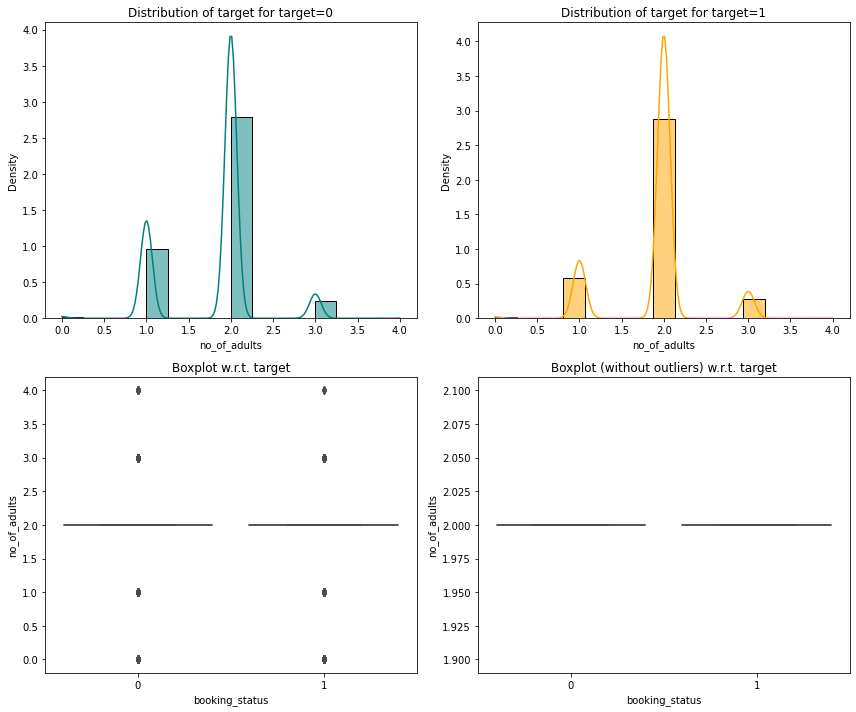

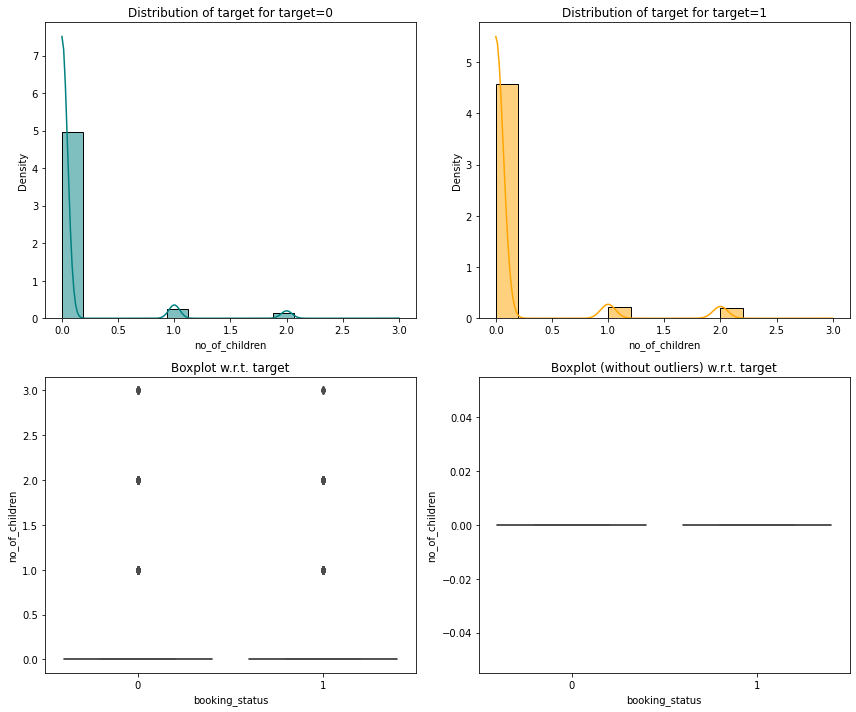

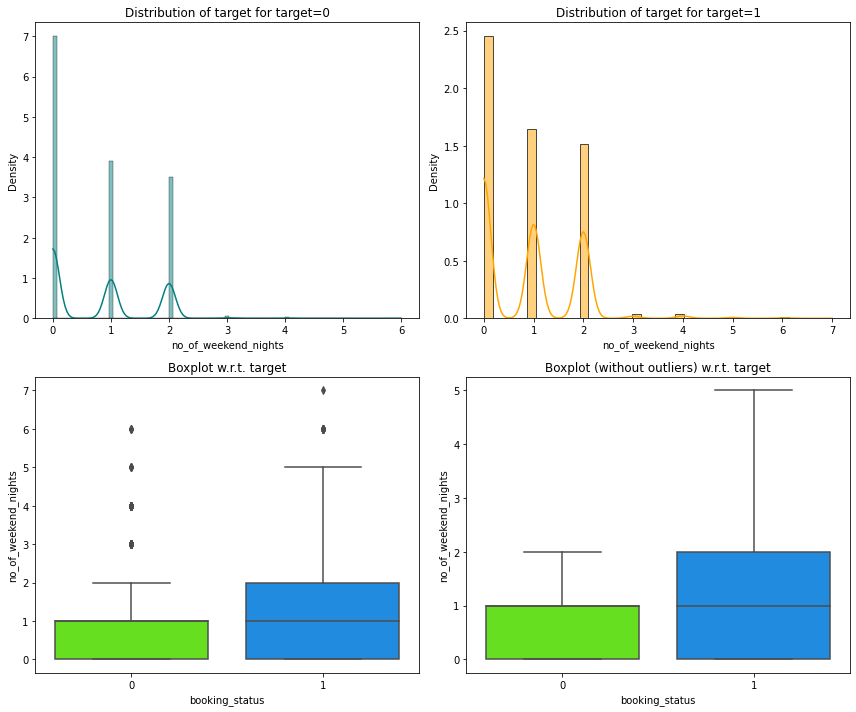

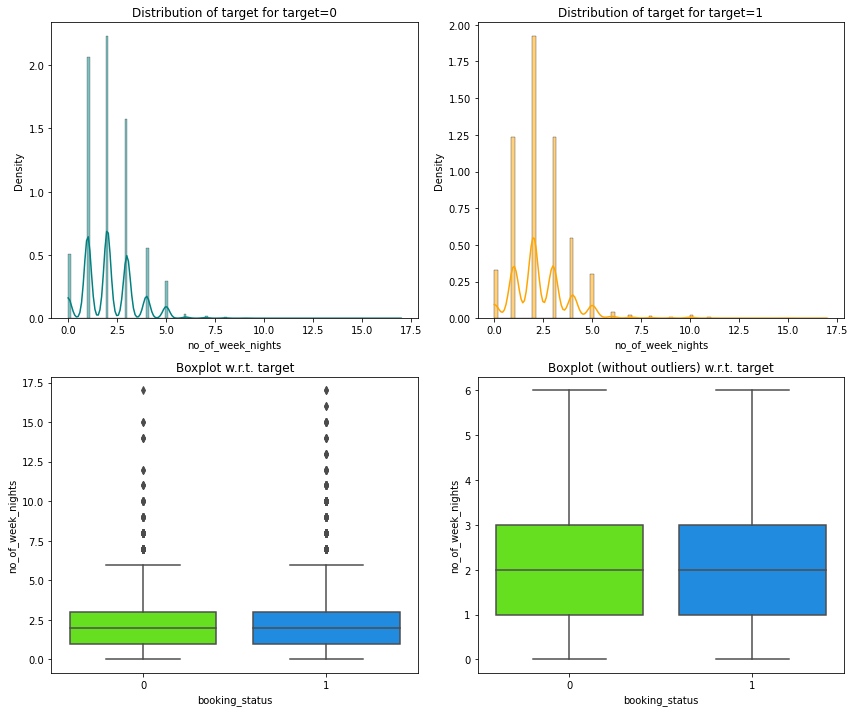

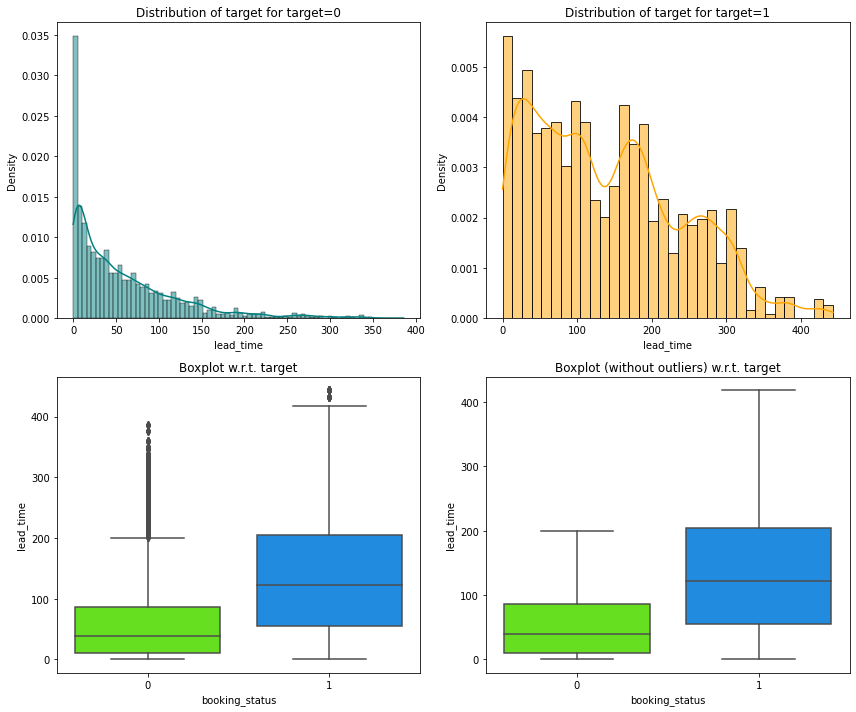

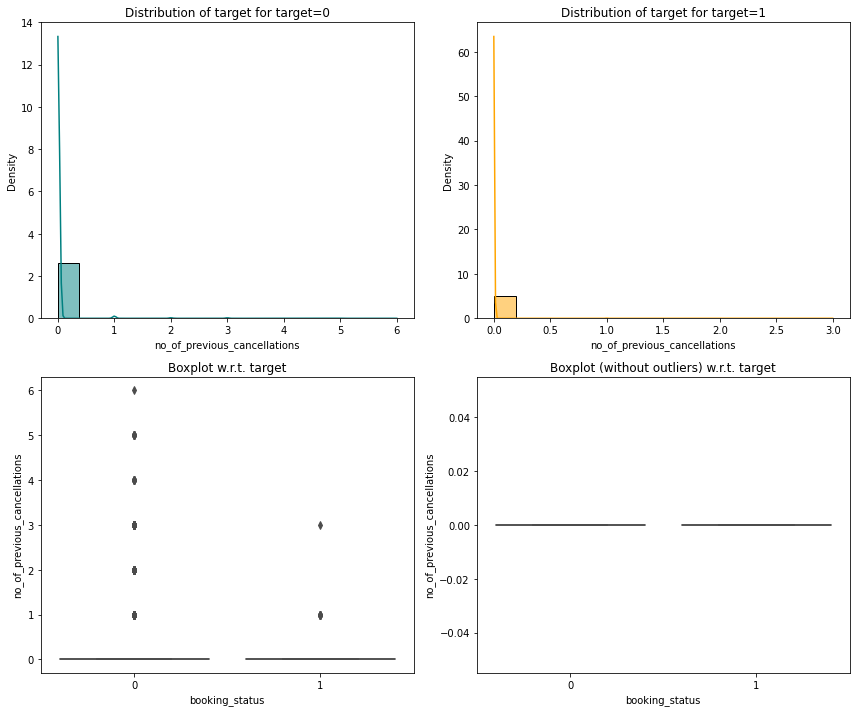

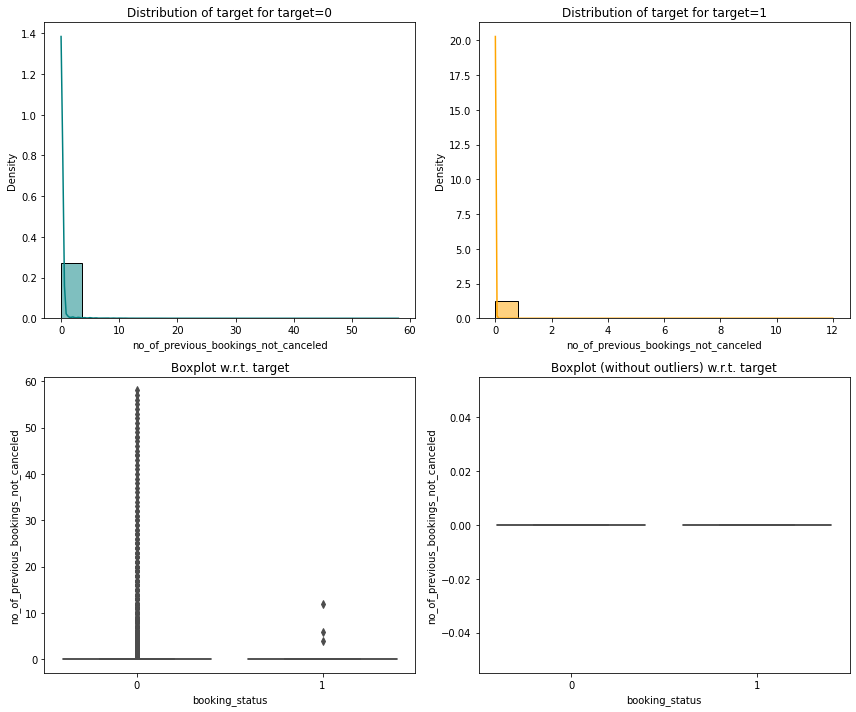

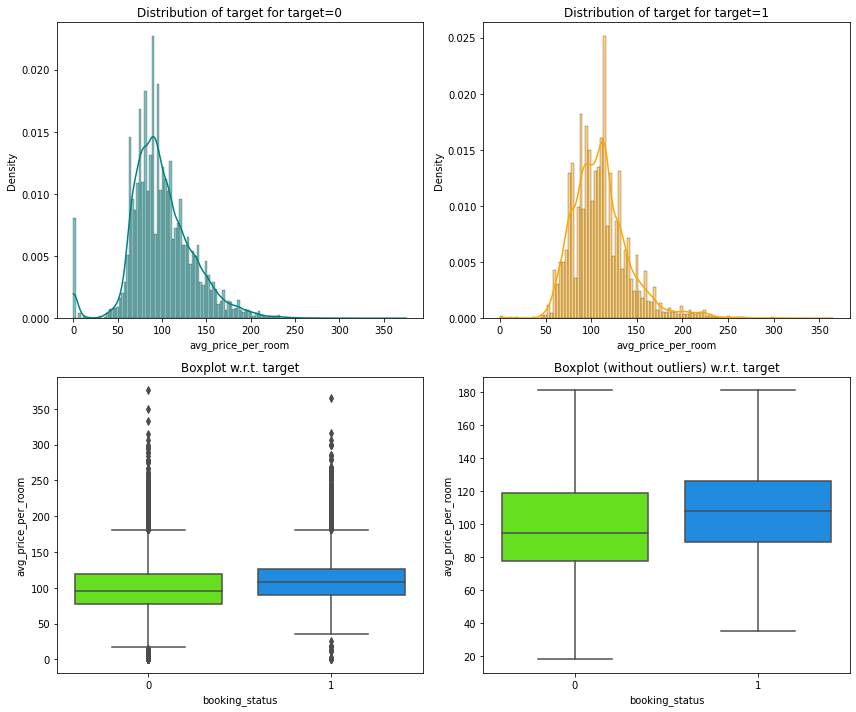

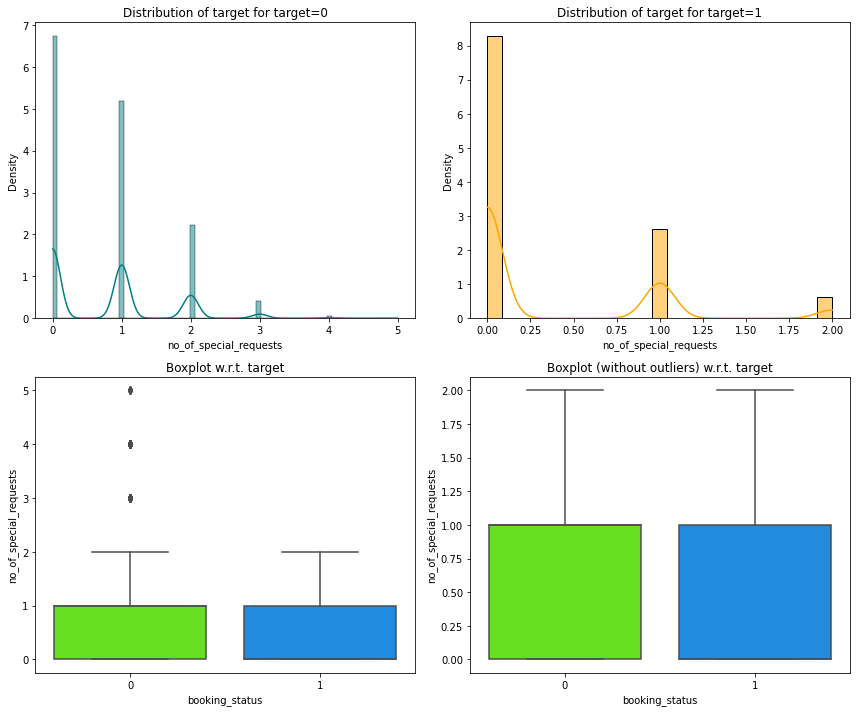

In [ ]:
# Rechecking distributions against target
for col in num_cols:
  distribution_plot_wrt_target(data, col, "booking_status")

booking_status          0       1
type_of_meal_plan                
Meal Plan 2       0.54433 0.45567
Not Selected      0.66829 0.33171
Meal Plan 1       0.68813 0.31187
Meal Plan 3       0.80000 0.20000
----------------------------------------------------------------------------------------------------


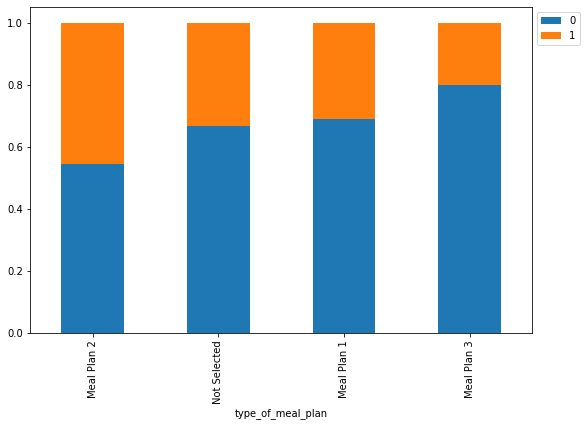

booking_status                   0       1
required_car_parking_space                
0                          0.66502 0.33498
1                          0.89831 0.10169
----------------------------------------------------------------------------------------------------


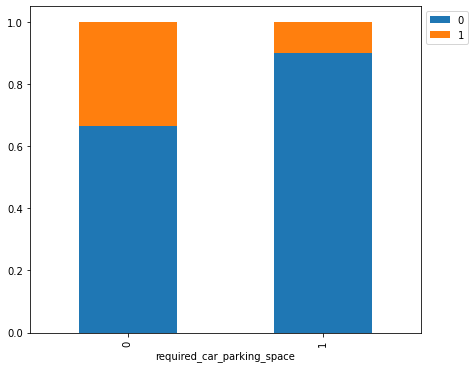

booking_status           0       1
room_type_reserved                
Room_Type 6        0.57971 0.42029
Room_Type 4        0.65807 0.34193
Room_Type 2        0.67149 0.32851
Room_Type 1        0.67738 0.32262
Room_Type 3        0.71429 0.28571
Room_Type 5        0.72830 0.27170
Room_Type 7        0.77215 0.22785
----------------------------------------------------------------------------------------------------


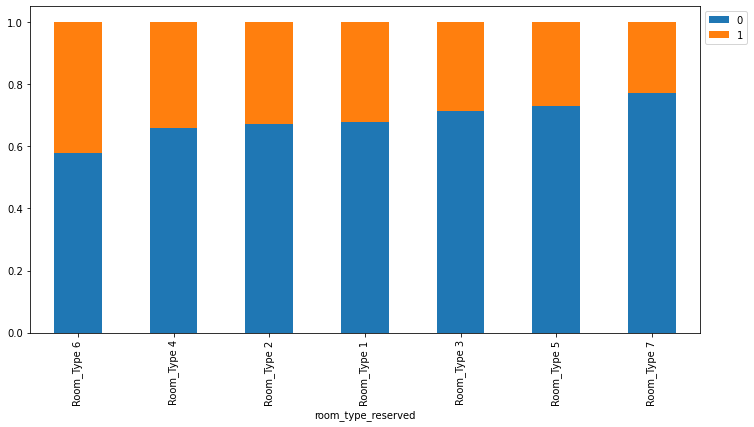

booking_status       0       1
arrival_year                  
2018           0.63273 0.36727
2017           0.85258 0.14742
----------------------------------------------------------------------------------------------------


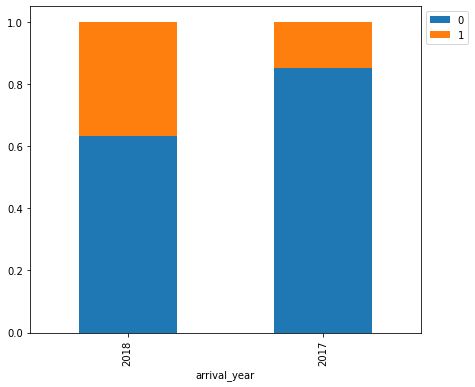

booking_status       0       1
arrival_month                 
7              0.55000 0.45000
6              0.59694 0.40306
8              0.60992 0.39008
5              0.63510 0.36490
4              0.63726 0.36274
10             0.64635 0.35365
9              0.66645 0.33355
3              0.70344 0.29656
11             0.70638 0.29362
2              0.74706 0.25294
12             0.86693 0.13307
1              0.97581 0.02419
----------------------------------------------------------------------------------------------------


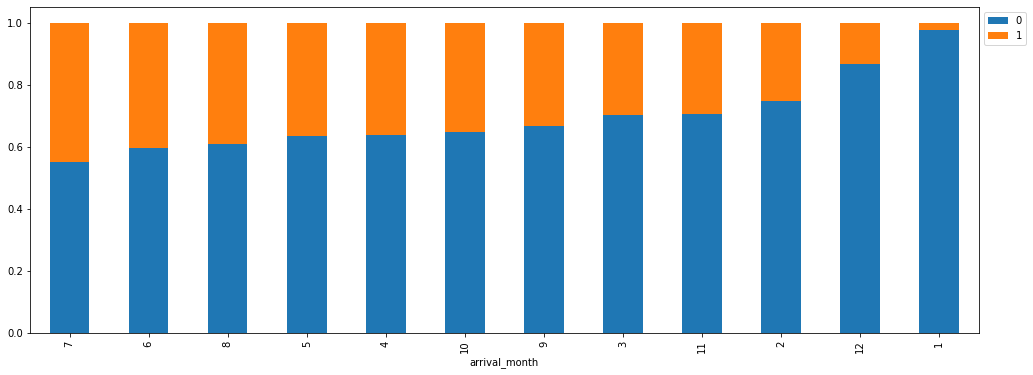

booking_status       0       1
arrival_date                  
15             0.57571 0.42429
1              0.58959 0.41041
12             0.61667 0.38333
30             0.61760 0.38240
26             0.62914 0.37086
3              0.63297 0.36703
16             0.63727 0.36273
28             0.64128 0.35872
4              0.64280 0.35720
6              0.65122 0.34878
23             0.65556 0.34444
25             0.65590 0.34410
22             0.65656 0.34344
24             0.66274 0.33726
17             0.66667 0.33333
7              0.67178 0.32822
21             0.67530 0.32470
20             0.67760 0.32240
19             0.68877 0.31123
31             0.69204 0.30796
11             0.69918 0.30082
13             0.69963 0.30037
8              0.70234 0.29766
27             0.70444 0.29556
10             0.70772 0.29228
18             0.70952 0.29048
5              0.71552 0.28448
29             0.71909 0.28091
14             0.73586 0.26414
9              0.74222 0.25778
2       

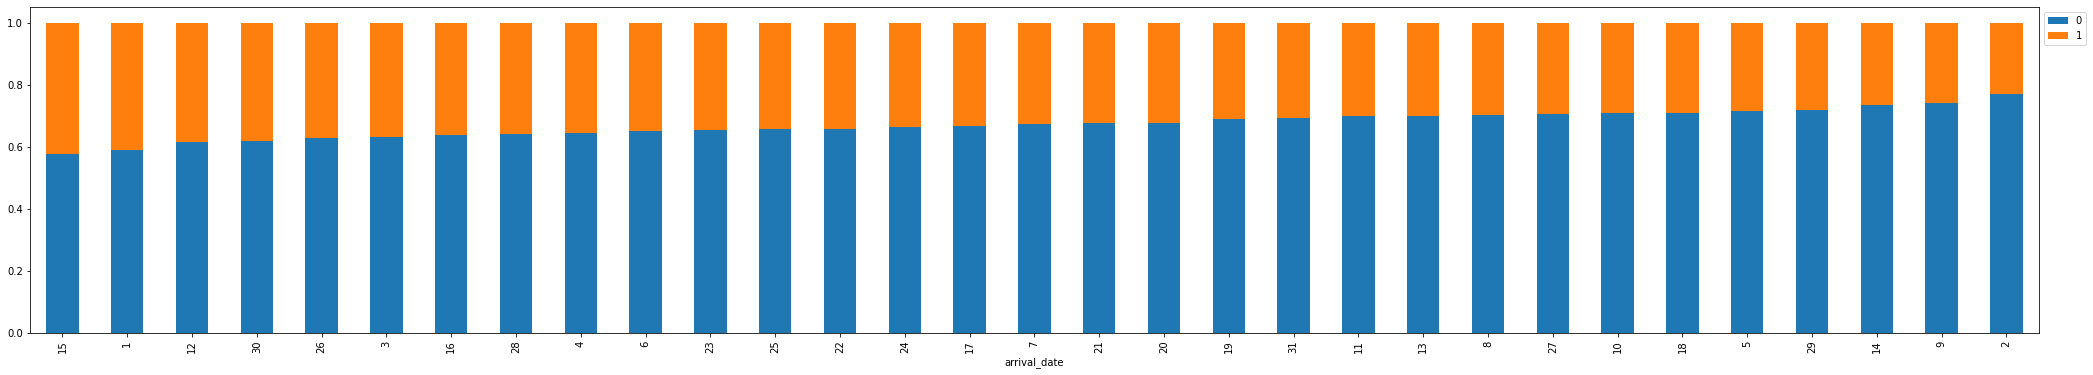

booking_status            0       1
market_segment_type                
Online              0.63454 0.36546
Offline             0.70085 0.29915
Aviation            0.70400 0.29600
Corporate           0.89087 0.10913
Complementary       1.00000 0.00000
----------------------------------------------------------------------------------------------------


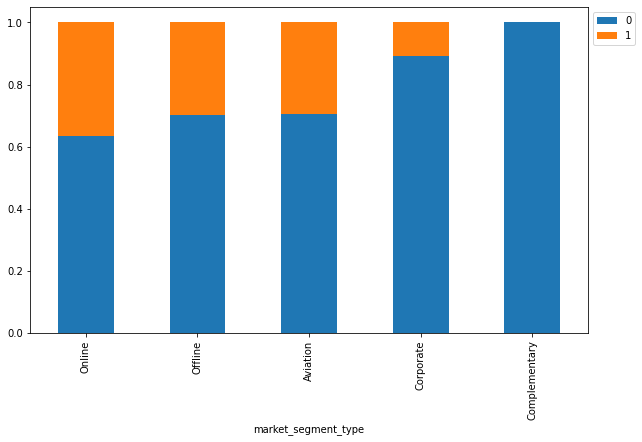

booking_status       0       1
repeated_guest                
0              0.66421 0.33579
1              0.98668 0.01332
----------------------------------------------------------------------------------------------------


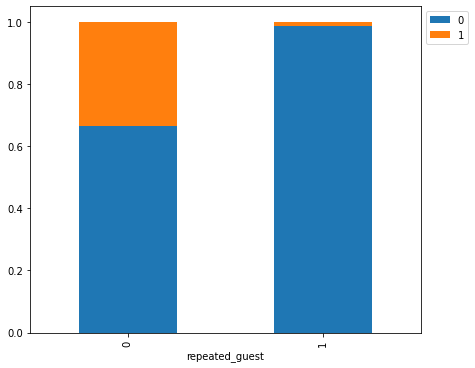

In [ ]:
# Rechecking stacked barplots against target
for col in cat_cols:
  if col != "booking_status":
    stacked_barplot(data, col, "booking_status")
  else:
    break

Not seeing any extreme changes in distributions or correlations, so hopefully data is still reflective of sample, but also a bit more fulfilling after cutting away outliers.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
logit = sm.Logit(y_train, x_train.astype(float)).fit(maxiter=500)

         Current function value: 0.424925
         Iterations: 500


Maximum number of iterations exceeded means likelihood of multicollinearity, so I will examine this possibility further.

In [ ]:
# Getting initial summary of logitic regression
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25369
Model:                          Logit   Df Residuals:                    25341
Method:                           MLE   Df Model:                           27
Date:                Sat, 28 Jan 2023   Pseudo R-squ.:                  0.3283
Time:                        03:12:19   Log-Likelihood:                -10780.
converged:                      False   LL-Null:                       -16048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -731.1692    119.922     -6.097      0.000    -966.211    -496.127
no_of_adults                             0.0654      

Many high p-values, but first I will check the variance inflation factors to see what needs to be corrected for multicollinearity.

In [ ]:
# Checking vif of all variables to examine multicollinearity
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39480147.74471
no_of_adults                                  1.33973
no_of_children                                2.03541
no_of_weekend_nights                          1.06779
no_of_week_nights                             1.09717
required_car_parking_space                    1.03600
lead_time                                     1.39754
arrival_year                                  1.42862
arrival_month                                 1.27432
arrival_date                                  1.00734
repeated_guest                                1.70997
no_of_previous_cancellations                  2.30107
no_of_previous_bookings_not_canceled          2.45833
avg_price_per_room                            2.03677
no_of_special_requests                        1.25894
type_of_meal_plan_Meal Plan 2                 1.27207
type_of_meal_plan_Meal Plan 3                 1.02464
type_of_meal_plan_Not Selected                1

VIFs above 5:
- market_segment_type_Corporate: 16.3
- market_segment_type_Offline: 60.9
- market_segment_type_Online: 67.6

Online had a p-value > 0.05, so I will test dropping this first

In [ ]:
# Test dropping market_segment_type_Online to see if that gets rid of multicollinearity
x_train2 = x_train.drop(["market_segment_type_Online"], axis=1)
logit2 = sm.Logit(y_train, x_train2).fit()

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
    index = x_train2.columns,
    dtype = float
)
print("Series after eliminating market_segment_type_Online: \n\n{}\n".format(vif_series2))

         Current function value: 0.424925
         Iterations: 35
Series after eliminating market_segment_type_Online: 

const                                  39395690.62467
no_of_adults                                  1.32262
no_of_children                                2.03450
no_of_weekend_nights                          1.06746
no_of_week_nights                             1.09560
required_car_parking_space                    1.03592
lead_time                                     1.39253
arrival_year                                  1.42590
arrival_month                                 1.27334
arrival_date                                  1.00734
repeated_guest                                1.70844
no_of_previous_cancellations                  2.30107
no_of_previous_bookings_not_canceled          2.45808
avg_price_per_room                            2.03594
no_of_special_requests                        1.25400
type_of_meal_plan_Meal Plan 2                 1.27168
type_of_meal_pl

All vif values are now well within standards, so I will move on to eliminating predictors with high p-values.

In [ ]:
# Actually dropping market_segment_type_Online and examining new summary
x_train = x_train.drop(["market_segment_type_Online"], axis=1)
logit3 = sm.Logit(y_train, x_train).fit()
print(logit3.summary())

         Current function value: 0.424925
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25369
Model:                          Logit   Df Residuals:                    25342
Method:                           MLE   Df Model:                           26
Date:                Sat, 28 Jan 2023   Pseudo R-squ.:                  0.3283
Time:                        03:12:21   Log-Likelihood:                -10780.
converged:                      False   LL-Null:                       -16048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -731.9141    119.784     -6.110      0.000    -966.686

In [ ]:
# Creating a loop to systematically eliminate predictors with high p-values
# until highest p-value is below 0.05
cols = x_train.columns.tolist()

max_p_value = 1

while len(cols) > 0:
  x_train_aux = x_train[cols]

  log_model = sm.Logit(y_train, x_train_aux).fit(disp=False)

  p_values = log_model.pvalues
  max_p_value = max(p_values)

  feature_with_p_max = p_values.idxmax()

  if max_p_value > 0.05:
    cols.remove(feature_with_p_max)
  else:
    break

# These are the columns that are significant in the model
selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
x_train = x_train[['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 
                    'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 
                    'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 
                    'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 
                    'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']].astype(float)

In [ ]:
logit4 = sm.Logit(y_train, x_train).fit(disp=False)
print(logit4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25369
Model:                          Logit   Df Residuals:                    25349
Method:                           MLE   Df Model:                           19
Date:                Sat, 28 Jan 2023   Pseudo R-squ.:                  0.3270
Time:                        03:12:23   Log-Likelihood:                -10800.
converged:                       True   LL-Null:                       -16048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -704.1801    119.409     -5.897      0.000    -938.218    -470.143
no_of_weekend_nights               0.1342      0.020      6.777      0.

In [ ]:
# Now making predictions on training set to see performance on training set
pred_train = logit4.predict(x_train)
pred_train = np.round(pred_train)

print("Accuracy on training set: ", accuracy_score(y_train, pred_train))

Accuracy on training set:  0.8061413536205605


Model is performing well on the training set! This means nothing about whether it's a generalized model (:'D), but I'm still pleased to see multicollinearity and insignificant variables not being a problem anymore!

In [ ]:
# Converting coefficients to odds
odds = np.exp(logit4.params)

perc_change_odds = (np.exp(logit4.params) - 1) * 100

pd.set_option("display.max_columns", None)

pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000               1.14367            1.05029   
Change_odd% -100.00000              14.36684            5.02868   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.21204    1.01588       1.41568   
Change_odd%                   -78.79616    1.58786      41.56793   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95552         0.03395                       2.12524   
Change_odd%       -4.44821       -96.60453                     112.52366   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01957                 0.23044   
Change_odd%             1.95704               -76.95595   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.17565                         1.31189   
Change_odd%                       17.56516                        31.18903   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.65316                         0.76395   
Change_odd%                       -34.68372                       -23.60527   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.49132                         0.49226   
Change_odd%                       -50.86809                       -50.77402   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                0.17995                        0.41445   
Change_odd%                       -82.00481                      -58.55510   

             market_segment_type_Offline  
Odds                             0.16737  
Change_odd%                    -83.26257

Coefficient interpretations:
- **no_of_weekend_nights**: holding all other features constant, a unit change in no_of_weekend_nights will increase the odds of a cancellation by 1.14 times or a 14.4% increase in odds.
- **no_of_week_nights**: holding all other features constant, a unit change in no_of_week_nights will increase the odds of a cancellation by 1.05 times or a 5.03% increase in odds.
- **required_car_parking_space**: holding all other features constant, a unit change in required_car_parking_space will decrease the odds of a cancellation by 0.21 times or a 78.8% decrease in odds.
- **lead_time**: holding all other features constant, a unit change in lead_time will increase the odds of a cancellation by 1.02 times or a 1.59% increase in odds.
- **arrival_year**: holding all other features constant, a unit change in arrival_year will increase the odds of a cancellation by 1.42 times or a 41.6% increase in odds.
- **arrival_month**: holding all other features constant, a unit change in arrival_month will decrease the odds of a cancellation by 0.96 times or a 4.45% decrease in odds.
- **repeated_guest**: holding all other features constant, a unit change in repeated_guest will decrease the odds of a cancellation by 0.034 times or a 96.6% decrease in odds.
- **no_of_previous_cancellations**: holding all other features constant, a unit change in no_of_previous_cancellations will increase the odds of a cancellation by 2.13 times or a 113% increase in odds.
- **avg_price_per_room**: holding all other features constant, a unit change in avg_price_per_room will increase the odds of a cancellation by 1.02 times or a 1.96% increase in odds.
- **no_of_special_requests**: holding all other features constant, a unit change in no_of_special_requests will decrease the odds of a cancellation by 0.23 times or a 77.0% decrease in odds.
- **no_of_special_requests**: holding all other features constant, a unit change in no_of_special_requests will decrease the odds of a cancellation by 0.23 times or a 77.0% decrease in odds.
- **type_of_meal_plan_Meal Plan 2**: holding all other features constant, a unit change in no_of_special_requests will increase the odds of a cancellation by 1.18 times or a 17.6% increase in odds.
- **type_of_meal_plan_Not Selected**: holding all other features constant, a unit change in type_of_meal_plan_Not Selected will increase the odds of a cancellation by 1.31 times or a 31.2% increase in odds.
- **room_type_reserved_Room_Type 2**: holding all other features constant, a unit change in room_type_reserved_Room_Type 2 will decrease the odds of a cancellation by 0.65 times or a 34.7% decrease in odds.
- **room_type_reserved_Room_Type 4**: holding all other features constant, a unit change in room_type_reserved_Room_Type 4 will decrease the odds of a cancellation by 0.76 times or a 23.6% decrease in odds.
- **room_type_reserved_Room_Type 5**: holding all other features constant, a unit change in room_type_reserved_Room_Type 5 will decrease the odds of a cancellation by 0.49 times or a 50.9% decrease in odds.
- **room_type_reserved_Room_Type 6**: holding all other features constant, a unit change in room_type_reserved_Room_Type 6 will decrease the odds of a cancellation by 0.49 times or a 50.8% decrease in odds.
- **room_type_reserved_Room_Type 7**: holding all other features constant, a unit change in room_type_reserved_Room_Type 7 will decrease the odds of a cancellation by 0.18 times or a 82.0% decrease in odds.
- **market_segment_type_Corporate**: holding all other features constant, a unit change in market_segment_type_Corporate will decrease the odds of a cancellation by 0.41 times or a 58.6% decrease in odds.
- **market_segment_type_Offline**: holding all other features constant, a unit change in market_segment_type_Corporate will decrease the odds of a cancellation by 0.17 times or a 83.3% decrease in odds.

## Building a Logistic Regression model

**The model can make wrong predictions:**
1. Model predicts cancellation as a non-cancellation - False Negative
2. Model predicts non-cancellation as a cancellation - False Positive

The company would want to reduce false negatives, because the goal is for the guest to not cancel their booking. In order to reduce these false negatives, I will focus on maximizing the Recall.

I will define two functions: one to check the model performance and the other to plot the confusion matrix.

In [ ]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as cancellation
    """

    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred) 
    f1 = f1_score(target, pred) 

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
  """
  Function to plot the confusion matrix of a classification model with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  threshold: threshold for classifying the observation as cancellation
  """
  y_pred = model.predict(predictors) > threshold
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
       for item in cm.flatten()
      ]
  ).reshape(2,2)

  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

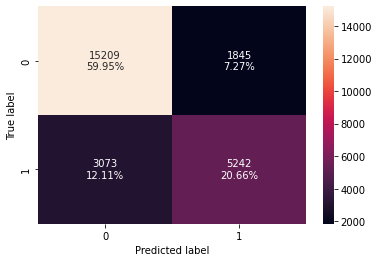

In [ ]:
# Confusion matrix on model
confusion_matrix_statsmodels(logit4, x_train, y_train)

In [ ]:
# Examining performance statistics to see how model actually performed
log_reg_model_train_perf = model_performance_classification_statsmodels(
    logit4, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80614 0.63043    0.73966 0.68069

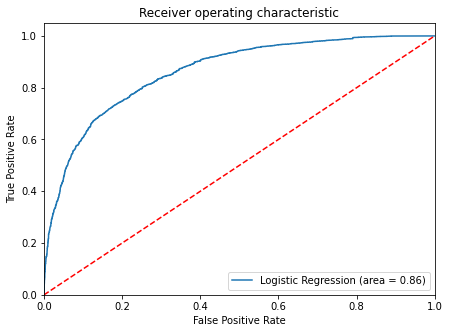

In [ ]:
# Plotting AUC-ROC plot on training set
logit_roc_auc_train = roc_auc_score(y_train, logit4.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, logit4.predict(x_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Model is performing well on the training set, but I'm curious to see if it can be improved. I will check the optimal threshold.

In [ ]:
# Optimal threshold as per AUC-ROC curve
# Finding where tpr is high, but fpr is low

fpr, tpr, thresholds = roc_curve(y_train, logit4.predict(x_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36936312709463853


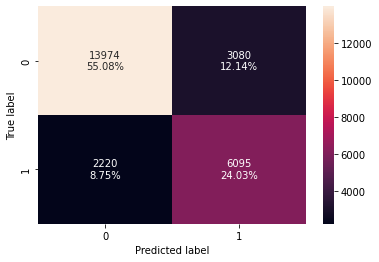

In [ ]:
# Creating confusion matrix with optimal threshold
confusion_matrix_statsmodels(
    logit4, x_train, y_train, threshold = optimal_threshold_auc_roc
)

In [ ]:
# Checking model performance for optimal threshold model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit4, x_train, y_train, threshold = optimal_threshold_auc_roc
)
print("Training performance: ")
log_reg_model_train_perf_threshold_auc_roc

Training performance: 


Accuracy  Recall  Precision      F1
0   0.79108 0.73301    0.66431 0.69697

Model recall has increased, while still keeping relatively stable values for other statistics:
- Accuracy -0.015
- Recall +0.103
- Precision -0.075
- F1 +0.016

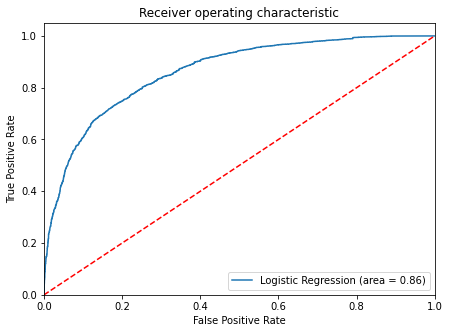

In [ ]:
# Remembering original ROC-AUC plot
logit_roc_auc_train = roc_auc_score(y_train, logit4.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, logit4.predict(x_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

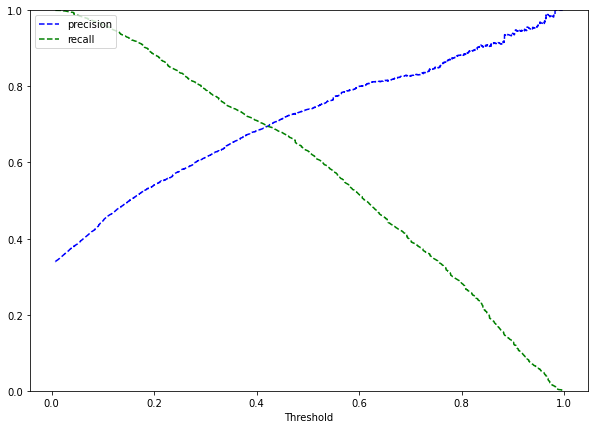

In [ ]:
# Using precision-recall curve to see if threshold can be optimized further
y_scores = logit4.predict(x_train)
prec, rec, tre = precision_recall_curve(y_train, y_scores)

def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="precision")
  plt.plot(thresholds, recalls[:-1], "g--", label="recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_thresh(prec, rec, tre)
plt.show()

Curve suggests that threshold could even be moved further right, maybe to 0.40 or so.

In [ ]:
# Setting optimal threshold, according to prec-rec curve
optimal_threshold_curve = 0.40

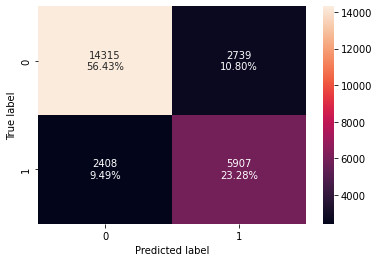

In [ ]:
confusion_matrix_statsmodels(logit4, x_train, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    logit4, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance: ")
log_reg_model_train_perf_threshold_curve

Training performance: 


Accuracy  Recall  Precision      F1
0   0.79711 0.71040    0.68321 0.69654

Recall is improved from original model, but it is slightly decreased in comparison to the AUC-ROC curve. Given that recall is the statistic that I'm trying to maximize and it was the largest decrease out of the stats on the curve threshold model, I will stick with the AUC-ROC model threshold of 0.37.

## Model performance evaluation

In [ ]:
# Comparing the performance of models created
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis = 1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.40 Threshold"
]

print("Training performance comparison: ")
models_train_comp_df

Training performance comparison: 


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                          0.80614                             0.79108   
Recall                            0.63043                             0.73301   
Precision                         0.73966                             0.66431   
F1                                0.68069                             0.69697   

           Logistic Regression-0.40 Threshold  
Accuracy                              0.79711  
Recall                                0.71040  
Precision                             0.68321  
F1                                    0.69654

In [ ]:
# Creating x_test set that has significant columns
# Changed x_test3 to x_test for continuity
x_train = x_train[x_train.columns].astype(float)
x_test = x_test[x_train.columns].astype(float)

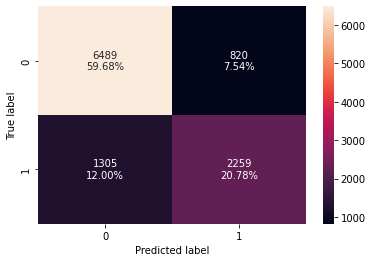

In [ ]:
# Starter confusion matrix for test set
confusion_matrix_statsmodels(logit4, x_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    logit4, x_test, y_test
)

print("Test performance: ")
log_reg_model_test_perf

Test performance: 


Accuracy  Recall  Precision      F1
0   0.80456 0.63384    0.73368 0.68011

Pretty similar to what I initially saw with the training set, so I will strive to improve it.

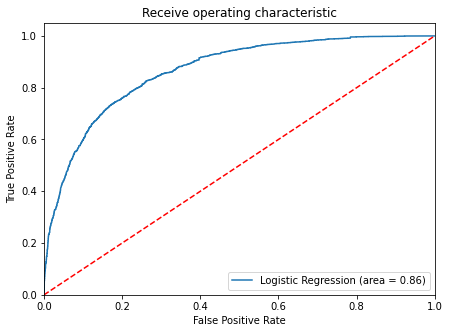

In [ ]:
# ROC curve on test set
logit_roc_auc_test = roc_auc_score(y_test, logit4.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logit4.predict(x_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %-.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

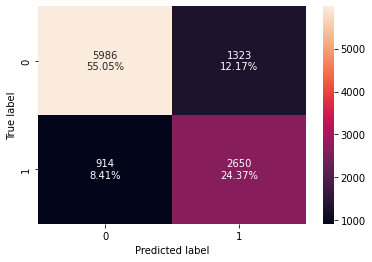

In [ ]:
# Confusion matrix with AUC-ROC threshold
confusion_matrix_statsmodels(logit4, x_test, y_test, threshold=optimal_threshold_auc_roc)

Definitely a better rate of false negatives than just using statsmodels

In [ ]:
# Checking performance for AUC-ROC model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit4, x_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance: ")
log_reg_model_test_perf_threshold_auc_roc

Test performance: 


Accuracy  Recall  Precision      F1
0   0.79426 0.74355    0.66700 0.70320

Even better recall score than on the training set!

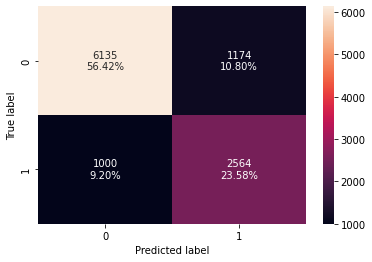

In [ ]:
# Confusion matrix using curve threshold
confusion_matrix_statsmodels(logit4, x_test, y_test, threshold=optimal_threshold_curve)

In [ ]:
# Checking performance for AUC-ROC model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    logit4, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance: ")
log_reg_model_test_perf_threshold_curve

Test performance: 


Accuracy  Recall  Precision      F1
0   0.80006 0.71942    0.68593 0.70227

## Final Model Summary

In [ ]:
# Training models comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis = 1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.40 Threshold"
]

print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                          0.80614                             0.79108   
Recall                            0.63043                             0.73301   
Precision                         0.73966                             0.66431   
F1                                0.68069                             0.69697   

           Logistic Regression-0.40 Threshold  
Accuracy                              0.79711  
Recall                                0.71040  
Precision                             0.68321  
F1                                    0.69654

In [ ]:
# Testing models comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T
    ],
    axis=1
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.40 Threshold"
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                          0.80456                             0.79426   
Recall                            0.63384                             0.74355   
Precision                         0.73368                             0.66700   
F1                                0.68011                             0.70320   

           Logistic Regression-0.40 Threshold  
Accuracy                              0.80006  
Recall                                0.71942  
Precision                             0.68593  
F1                                    0.70227

- All models are giving a generalized performance on the training and testing set.
- The highest recall is 74% on the testing set
- Using model with default threshold will give low recall, but good precision - This model will help the company save resources, but they could lose potential customers.
- Using model with 0.37 threshold will strike the best balance between precision and recall - This model will help the company identify potential customers while balancing the cost of resources.
- Using model with 0.40 threshold will give lower precision, but good recall - This model will help the company identify potential customers, but the cost of resources will be high.

In my opinion, the best model is the model with the 0.37 threshold because my main priority is maximizing recall. The 0.37 threshold allows for the highest recall, and the tradeoff between testing set recall and precision is in favor of precision for 0.40 threshold. The differences betweeen the test and training set performances are also so close that expenditure of resources and identification of potential customers is likely to be effectively equal.

## Building a Decision Tree model

In [ ]:
# Creating decision tree using gini criteria
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
  """
  Function to compute accuracy, recall, precision & f1 to check classification model performance

  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  df_perf = pd.DataFrame(
      {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
      index=[0]
  )

  return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  """
  Function to create confusion matrix with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  """

  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
       for item in cm.flatten()
      ]
  ).reshape(2, 2)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [ ]:
# Initial model performance on training set
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, x_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99326 0.98400    0.99538 0.98966

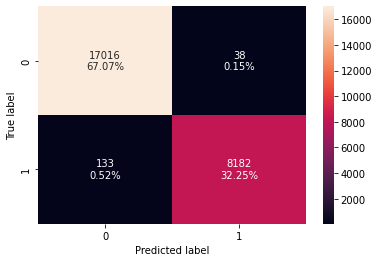

In [ ]:
confusion_matrix_sklearn(dTree, x_train, y_train)

Recall is at 98%, so doing well so far!

In [ ]:
# Model performance on test set
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, x_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86913 0.79966    0.80079 0.80022

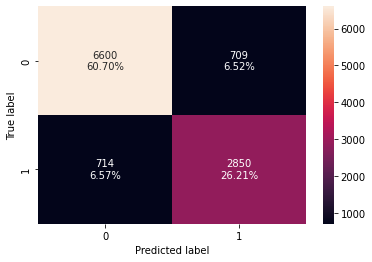

In [ ]:
confusion_matrix_sklearn(dTree, x_test, y_test)

Recall went down, as expected, but still at a pretty good rate of 80%. False Negatives are also low, at 6.57%.

In [ ]:
# Setting features for future model building and plotting
feature_names = list(x_train.columns)
print(feature_names)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


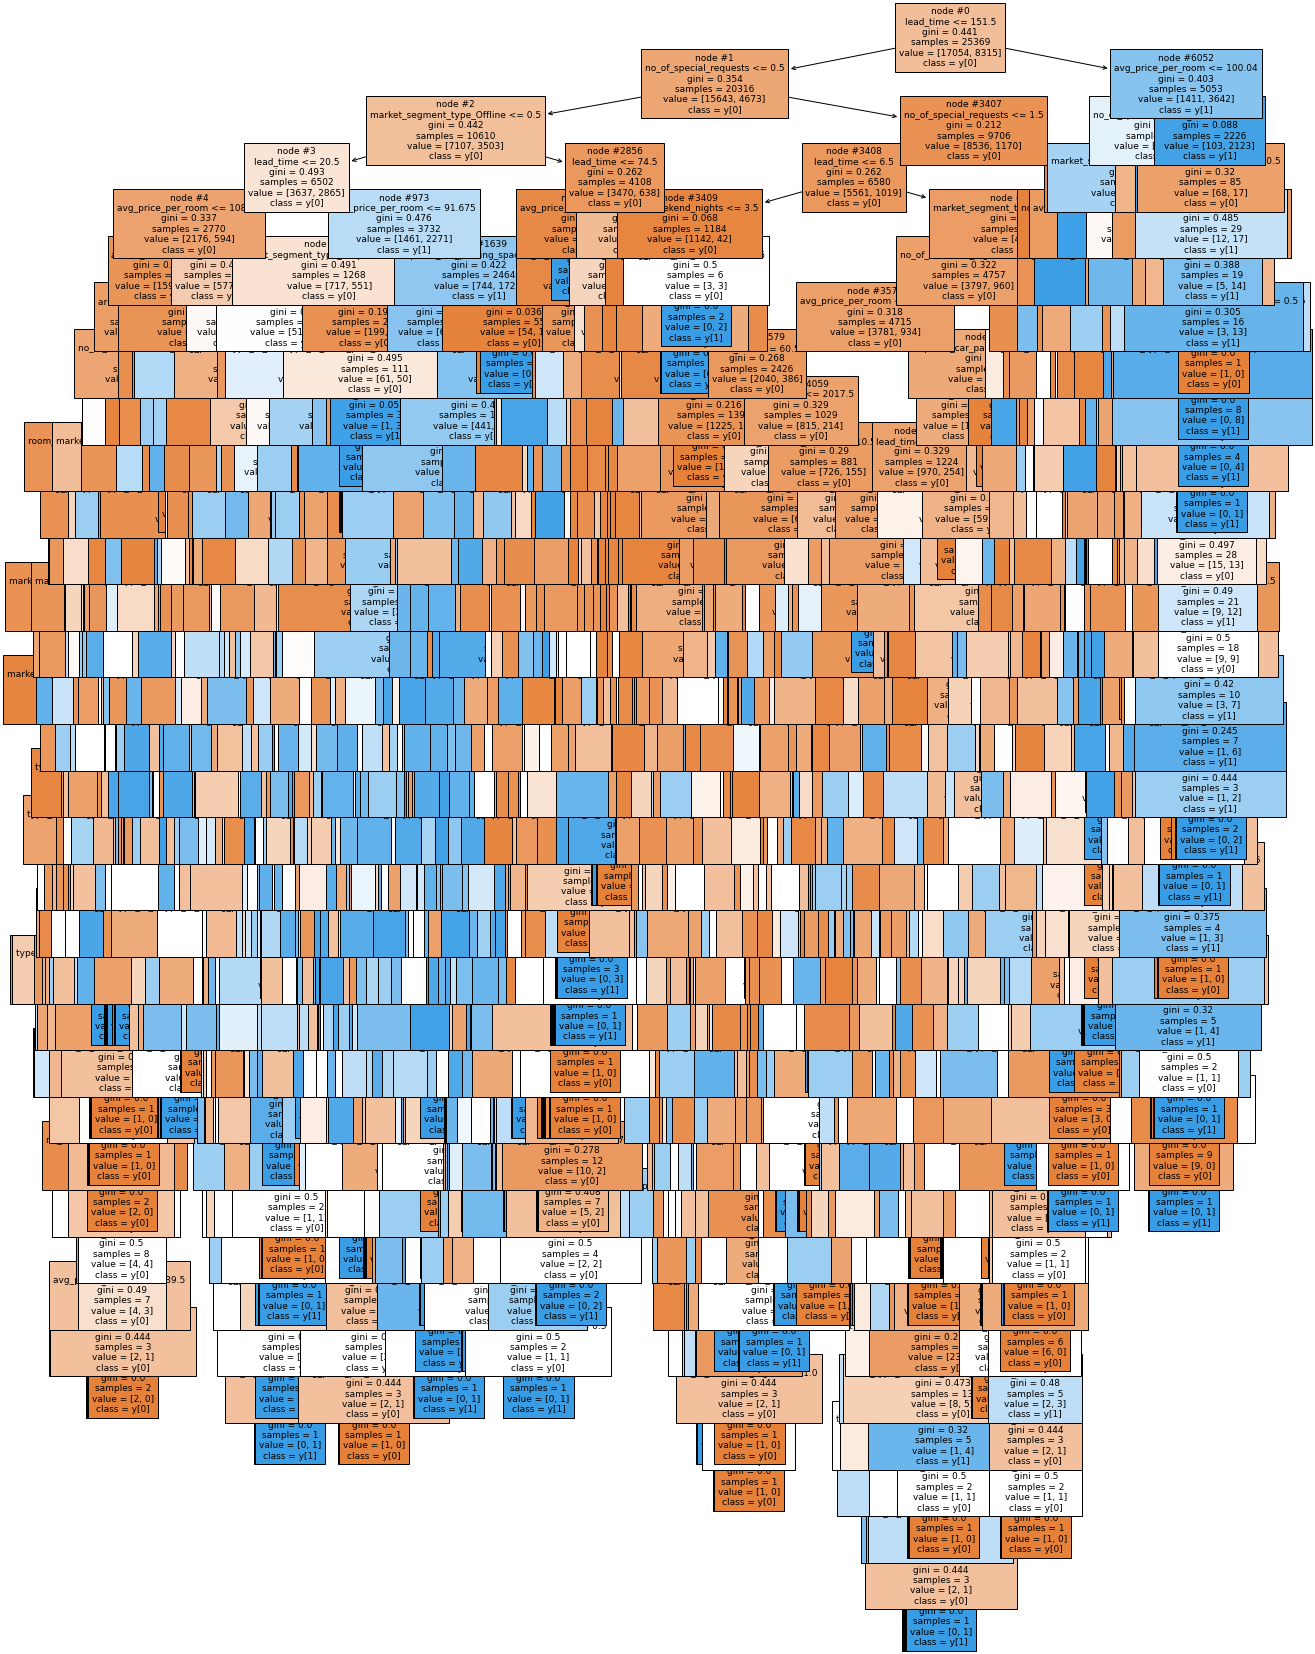

In [ ]:
# Visualizing tree to examine for overfitting
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()

In [ ]:
# Text version of decision tree
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 108.34
|   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |--- weights: [199.00, 0.00] class: 0
|   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |--- lead_time <= 8.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 74.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  74.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   | 

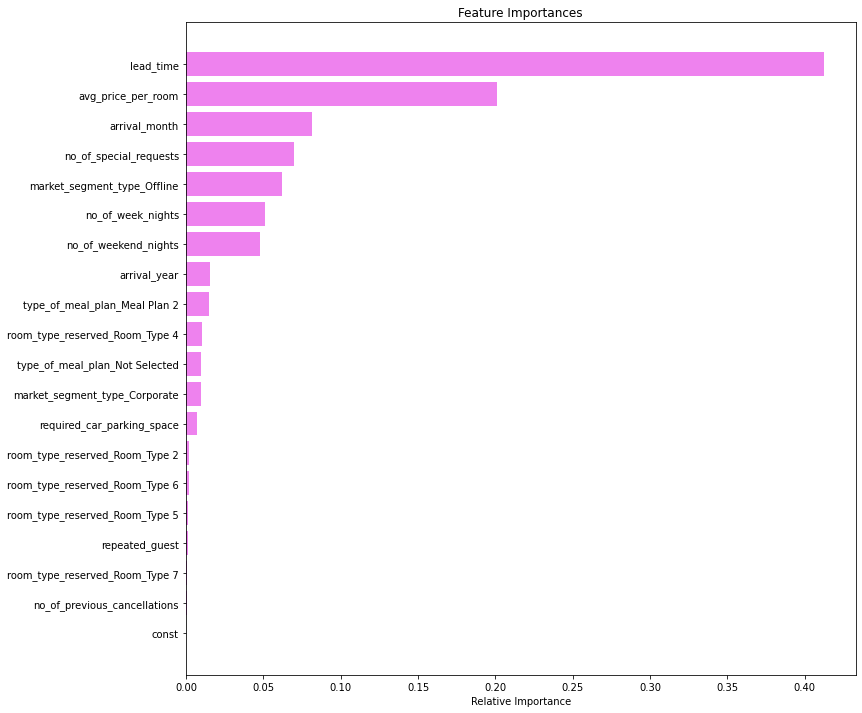

In [ ]:
# Getting importances of features in tree and visualizing
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Top 3 most important features in the model are lead_time, avg_price_per_room, and arrival_month. Room types (besides Type 4), repeated_guest, and no_of_previous_cancellations have no importance.

## Do we need to prune the tree?

Absolutely, this is still a VERY complex model that is likely suffering to death from overfitting. Poor thing...

###Pre-pruning

In [ ]:
# The new and improved tree that is getting trimmed at a max depth
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# Performance of depth-altered tree on training set
decision_tree_depth_perf_train = model_performance_classification_sklearn(
    dTree1, x_train, y_train
)
decision_tree_depth_perf_train

Accuracy  Recall  Precision      F1
0   0.77646 0.40625    0.82150 0.54365

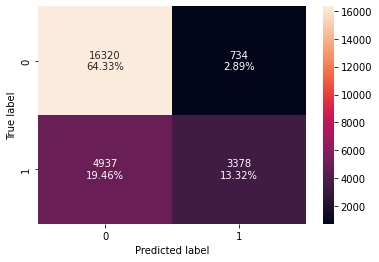

In [ ]:
confusion_matrix_sklearn(dTree1, x_train, y_train)

In [ ]:
# Performance of depth-altered tree on testing set
decision_tree_depth_perf_test = model_performance_classification_sklearn(
    dTree1, x_test, y_test
)
decision_tree_depth_perf_test

Accuracy  Recall  Precision      F1
0   0.77633 0.39927    0.83022 0.53922

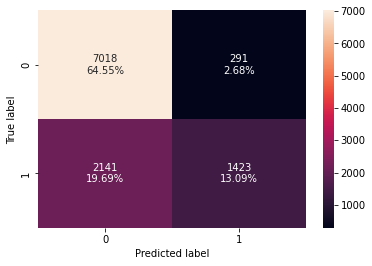

In [ ]:
confusion_matrix_sklearn(dTree1, x_test, y_test)

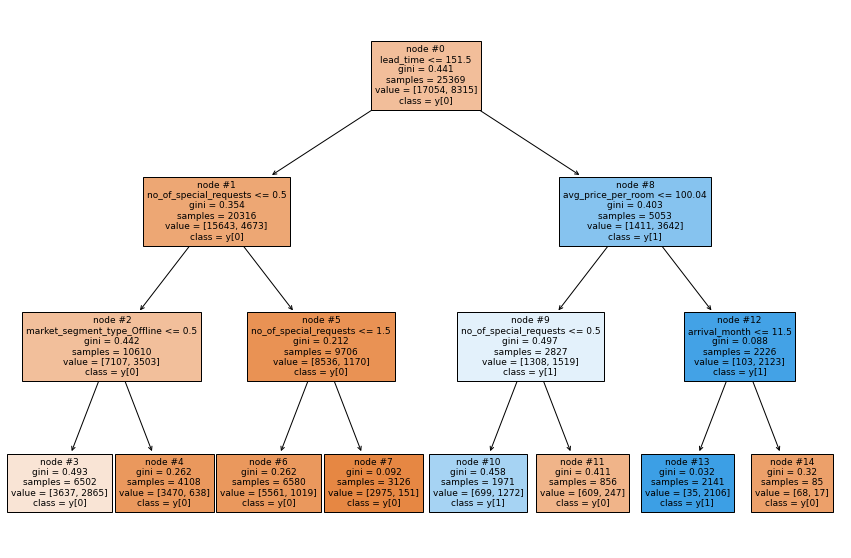

In [ ]:
#Visualizing depth-altered tree
plt.figure(figsize=(15,10))
tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True
)
plt.show()

In [ ]:
# Text report for rules of tree
print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- weights: [3637.00, 2865.00] class: 0
|   |   |--- market_segment_type_Offline >  0.50
|   |   |   |--- weights: [3470.00, 638.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [5561.00, 1019.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2975.00, 151.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [699.00, 1272.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [609.00, 247.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [35.00, 2106.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [68.00, 17.00] class: 0



Looks much better, but this is only because the max depth has been set very low. While it is a more general model, this does not necessarily mean that the model will perform well and make predictions with good recall. I will continue to test for other methods of pruning.

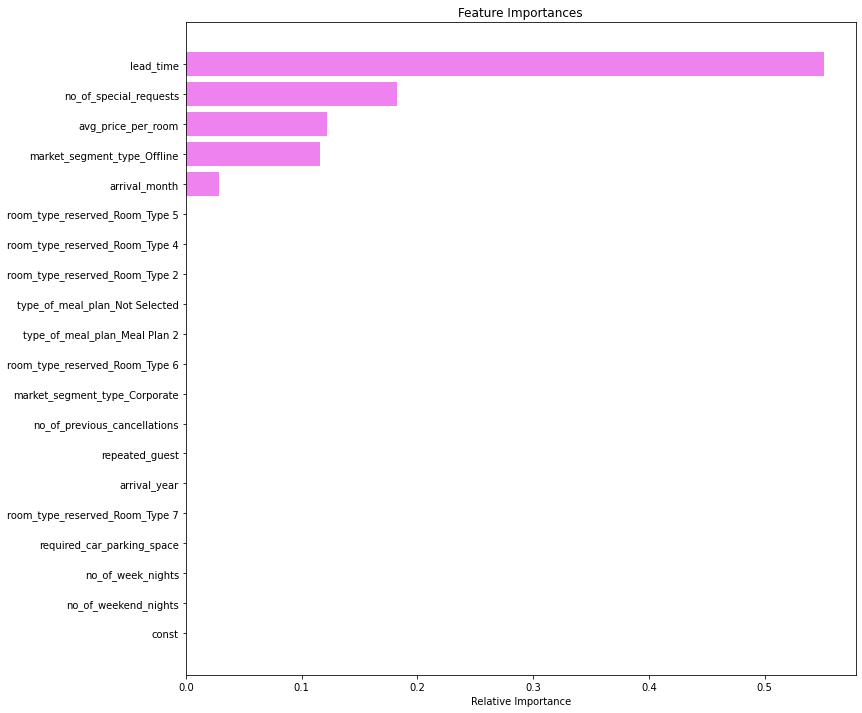

In [ ]:
# Finding importances of the depth-tuned tree
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Using GridSearch for hyperparameter for tuning
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1]
}
# Scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Running grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit best algorithm to data
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=1)

In [ ]:
# Checking hyperparam-tuned model performance on training set
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.79211 0.71112    0.67308 0.69158

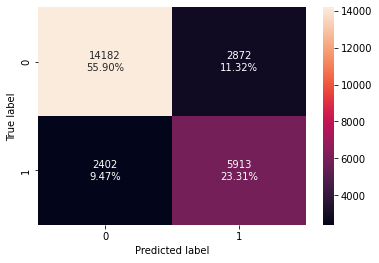

In [ ]:
confusion_matrix_statsmodels(estimator, x_train, y_train)

In [ ]:
# Checking hyperparam-tuned model performance on testing set
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.79454 0.71156    0.67771 0.69422

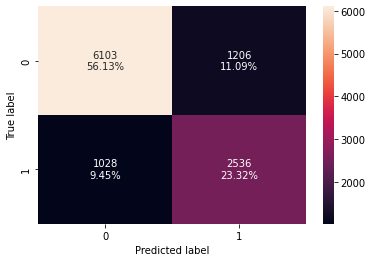

In [ ]:
confusion_matrix_sklearn(estimator, x_test, y_test)

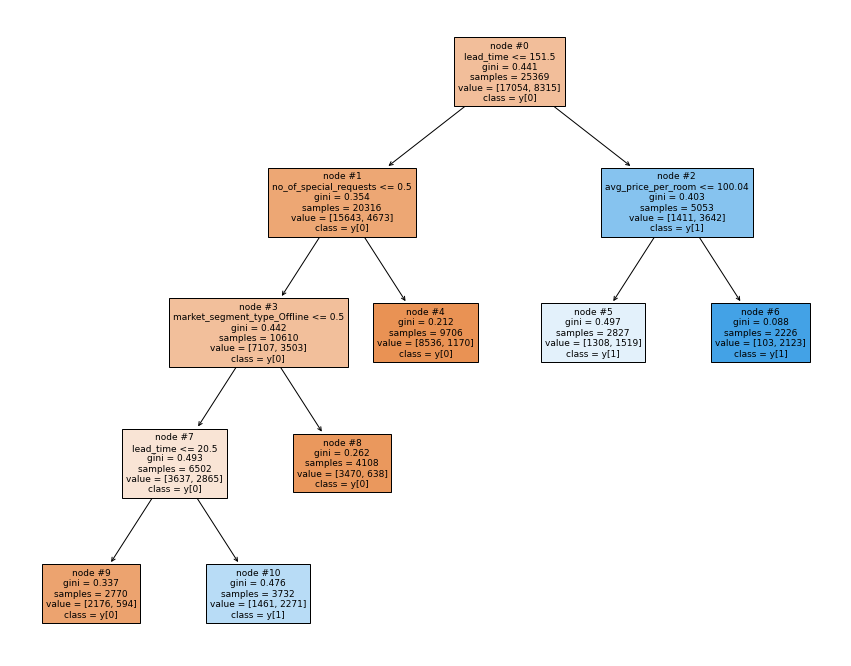

In [ ]:
# Visualizing the hyperparam-tuned tree
plt.figure(figsize=(15,12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True
)
plt.show()

In [ ]:
# Text report showing rules of hyperparameter tuned tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- weights: [2176.00, 594.00] class: 0
|   |   |   |--- lead_time >  20.50
|   |   |   |   |--- weights: [1461.00, 2271.00] class: 1
|   |   |--- market_segment_type_Offline >  0.50
|   |   |   |--- weights: [3470.00, 638.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8536.00, 1170.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1308.00, 1519.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [103.00, 2123.00] class: 1



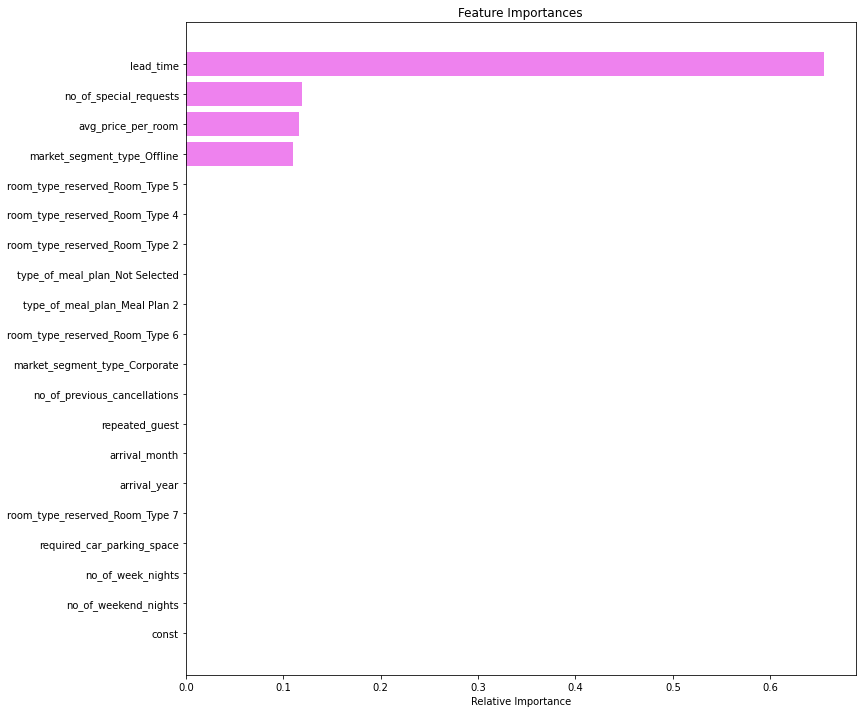

In [ ]:
# Checking importances of features in hyperparameter tuned tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Also a much smaller tree, but this one has been pruned less arbitrarily, so I am curious to see how much better post-pruning can do.

###Cost Complexity Pruning

In [ ]:
# Finding all the different leaves and loading alphas vs impurities
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00868
1        0.00000     0.00868
2        0.00000     0.00868
3        0.00000     0.00868
4        0.00000     0.00868
...          ...         ...
1419     0.00458     0.27956
1420     0.00704     0.29363
1421     0.01702     0.31066
1422     0.01773     0.36384
1423     0.07683     0.44067

[1424 rows x 2 columns]

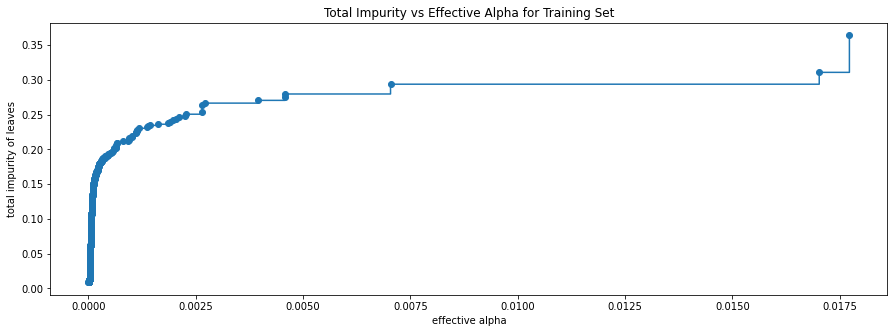

In [ ]:
# Plotting how effective alpha will affect impurity of leaves
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

In [ ]:
# Training decision tree with effective alphas and leaving off trivial tree
clfs=[]
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07682828530851676


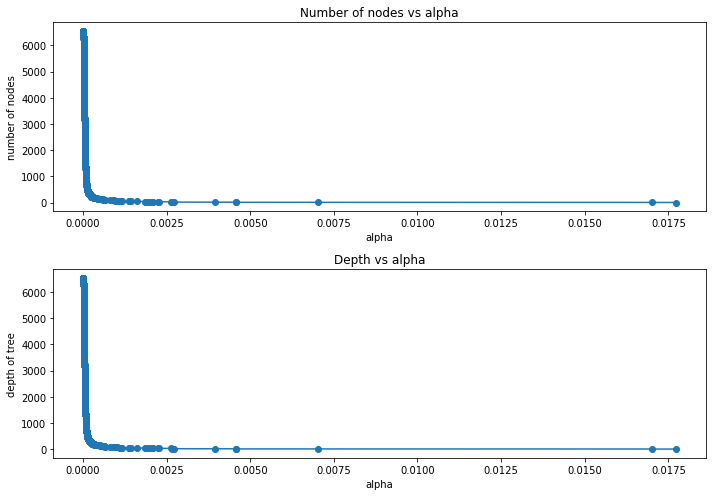

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.node_count for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
# Finding recall on the training set for post-pruned model
recall_train = []
for clf in clfs:
  pred_train = clf.predict(x_train)
  values_train = recall_score(y_train, pred_train)
  recall_train.append(values_train)

In [ ]:
# Finding recall on test set for post-pruned model
recall_test = []
for clf in clfs:
  pred_test = clf.predict(x_test)
  values_test = recall_score(y_test, pred_test)
  recall_test.append(values_test)

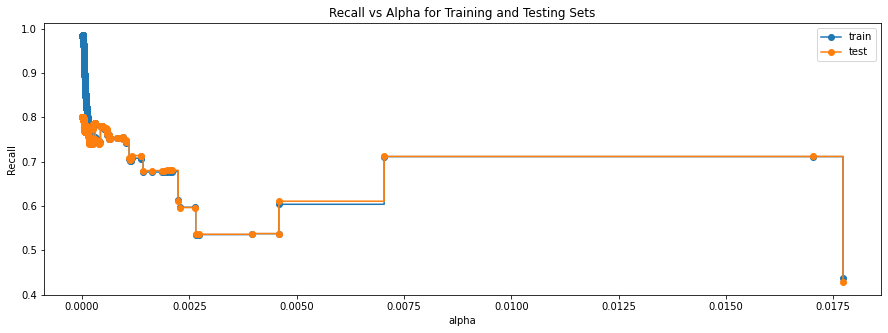

In [ ]:
# Plotting recall vs alpha of post-pruned tree for both sets to estimate best alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Model with highest recall on training and testing sets
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
# Model performance on training set
decision_tree_postpruned_perf_train = model_performance_classification_statsmodels(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.99326 0.98400    0.99538 0.98966

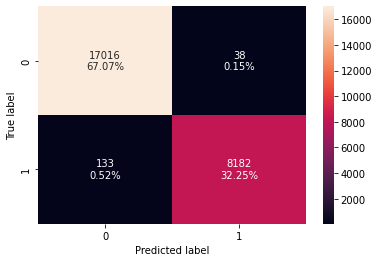

In [ ]:
confusion_matrix_statsmodels(best_model, x_train, y_train)

In [ ]:
# Model performance on testing set
decision_tree_postpruned_perf_test = model_performance_classification_statsmodels(
    best_model, x_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.86913 0.79966    0.80079 0.80022

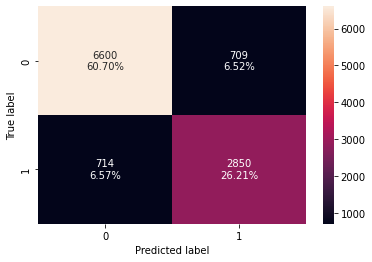

In [ ]:
confusion_matrix_statsmodels(best_model, x_test, y_test)

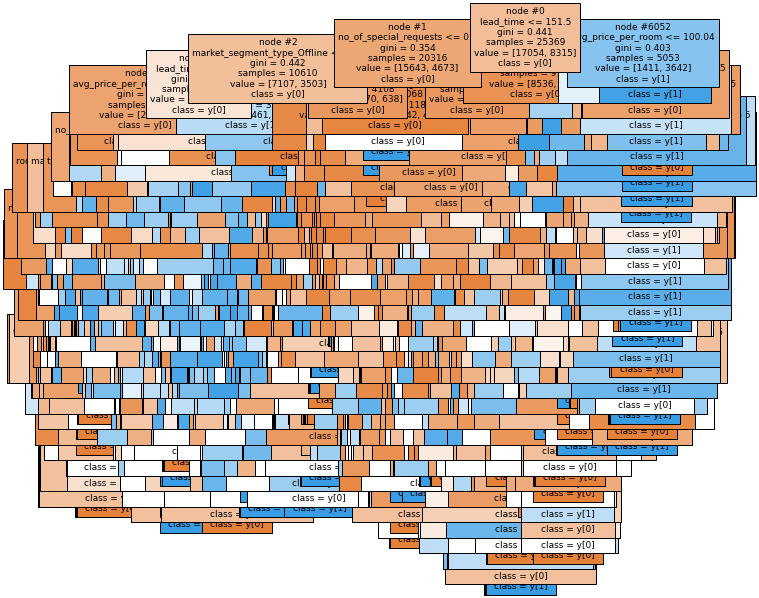

In [ ]:
# Visualizing tree
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()

In [ ]:
# Text version of visualization
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 108.34
|   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |--- weights: [199.00, 0.00] class: 0
|   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |--- lead_time <= 8.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 74.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  74.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   | 

In [ ]:
# Printing variables' gini importances
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
lead_time                      0.41219
avg_price_per_room             0.20097
arrival_month                  0.08179
no_of_special_requests         0.06962
market_segment_type_Offline    0.06185
no_of_week_nights              0.05131
no_of_weekend_nights           0.04786
arrival_year                   0.01551
type_of_meal_plan_Meal Plan 2  0.01483
room_type_reserved_Room_Type 4 0.01012
type_of_meal_plan_Not Selected 0.00997
market_segment_type_Corporate  0.00948
required_car_parking_space     0.00737
room_type_reserved_Room_Type 2 0.00210
room_type_reserved_Room_Type 6 0.00170
room_type_reserved_Room_Type 5 0.00136
repeated_guest                 0.00101
room_type_reserved_Room_Type 7 0.00055
no_of_previous_cancellations   0.00040
const                          0.00000


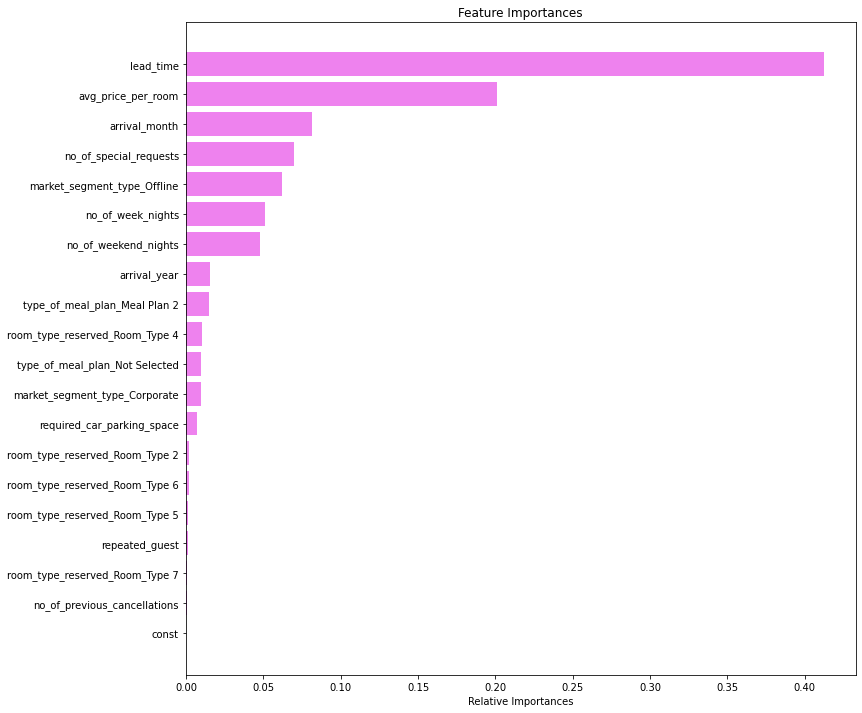

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importances")
plt.show()

Definitely better than the original, and likely more balanced between recall and complexity.

## Model Performance Comparison and Conclusions

In [ ]:
# Train performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_depth_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T
    ], axis=1
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Max Depth)",
    "Decision Tree (Hyperparameter Tuning)",
    "Decision Tree (Post-Pruning)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Max Depth)  \
Accuracy                 0.99326                    0.77646   
Recall                   0.98400                    0.40625   
Precision                0.99538                    0.82150   
F1                       0.98966                    0.54365   

           Decision Tree (Hyperparameter Tuning)  Decision Tree (Post-Pruning)  
Accuracy                                 0.79211                       0.99326  
Recall                                   0.71112                       0.98400  
Precision                                0.67308                       0.99538  
F1                                       0.69158                       0.98966

In [ ]:
# Test performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_depth_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T
    ], axis=1
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree(max depth)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)"
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Max Depth)  \
Accuracy                 0.99326                    0.77646   
Recall                   0.98400                    0.40625   
Precision                0.99538                    0.82150   
F1                       0.98966                    0.54365   

           Decision Tree (Hyperparameter Tuning)  Decision Tree (Post-Pruning)  
Accuracy                                 0.79211                       0.99326  
Recall                                   0.71112                       0.98400  
Precision                                0.67308                       0.99538  
F1                                       0.69158                       0.98966

It is hard for me to believe, but I am getting similar results for both the default tree and the cost-complexity pruned tree, despite the cost-complexity pruned tree had a markably smaller tree, and despite my manual confirmation that different models were, in fact, printed. Given its high statistics accross the board, I will say the best model to apply is the post-pruned one.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Profitable Policies Regarding Features of Highest Importance:
- Greater lead time tends to lead to more cancellations, so perhaps there could be a promotion to encourage keeping a booking that is more than 100 days away from check-in.
- For those who canceled their booking, it appears that the average price per room tended to be slightly higher than those who did not book. This could be due to several reasons, one of which being that they made the reservation, then did some market research and found a better booking/promotion/rate. My recommendation would be to ensure that regular market research is being applied to the rates to keep them competitive, as they are extremely flexible these days, or to run promotions or discounts to increase volume of kept bookings to compensate for the discounted rate.
- There seems to be a higher percentage of cancellation in the summer months (May-August), while most people who booked in the winter months (November-February) kept their booking. Encouraging those winter bookings could help ensure that bookings are kept and profits are ultimately seen by the company.
- Bookings that had more special requests (>2) seemed to be canceled less, so catering to those who have special requests would likely increase the chance of the booking being kept.
- Offline bookings also have about a 70% chance of not cancelling, so running exclusive promotions for that type of booking would likely also help target more successful bookings.
- Seeing as there are a good amount of guests who stay for more than a few days, bumping the rate per night up a bit for longer stays will lead to a larger aggregate profit and would likely be more palatable than increasing the average price per room, as this seems to lead to an increased rate of cancellations.

Other Recommendations:
- Meal Plan 1 is overwhelmingly chosen, and many people like to eat lunch or dinner in the area they're visiting, rather than the hotel. Either promote the other meal plans (maybe by having local restaurants come in and cater) or drop them and have paid snacks/extended breakfast available for guests to eat as a replacement to lunch or dinner.
- 97% of guests did not need a parking space, so perhaps cut back on valet service (if that's what is meant by the parking space designation) or utilize the space for something else. Perhaps guests (especially those coming from a road trip) would more appreciate a car detailing service, or an entirely different service, in place of it.
- While more people who booked in the winter months kept their reservations, January-March are the least popular months to book. Perhaps run some holiday/New Year promotions to encourage booking during these times, especially for business people who may be opting for AirBnBs or other competitors at the beginning of the year, due to preemptive/New Year financial speculation.
- While offline bookings are reliable, they only account for approximately 1/3 of observed bookings. Promoting this market segment to boost the occurence of offline bookings would help the company see more profit from those bookings, as well.
- Something that stuck out to me was the appalling rate of non-repeated guests - 97% of guests making a reservation in 2017 and 2018 were not repeated guests. This means that retention of guests needs to be improved, especially because those who were repeated guests tended to keep their reservations pretty faithfully. I would recommend introducing a rewards program to encourage guests to continue to return, or checking staff performance to ensure there isn't a breakdown of service or comunication. A satisfaction survey at checkout asking what the company could do to more appeal to the guest's return would help with understanding what could be done in this realm, as well.